## Project 6: Visualizing Monetary Policy

In [1]:
!pip install pandas-datareader

In [2]:
import os 
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt

start = datetime.datetime(1948,1,1)
end = datetime.datetime.today()
start,end
df = web.DataReader("GDPC1","fred",start,end).resample("Q").mean()
df

GDPC1
DATE                 
1948-03-31   2087.442
1948-06-30   2121.899
1948-09-30   2134.056
1948-12-31   2136.440
1949-03-31   2107.001
...               ...
2021-12-31  20006.181
2022-03-31  19924.088
2022-06-30  19895.271
2022-09-30  20054.663
2022-12-31  20182.491

[300 rows x 1 columns]

In [3]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq= "M"):
    df_int =False 
    for key, code in data_codes.items():
        if df_int == False:
            df =web.DataReader(
            code, "fred", start, end).resample(freq).mean()
            #.first() or .last()
            df.rename(columns = {code:key},inplace=True)
            df_int=True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
        
    return df

In [4]:
data_codes ={"Base: Total":"BOGMBASEW",
            "Base: Currency in Cirulation":"WCURCIR"}
start = datetime.datetime(2002, 1,1)
end= datetime.datetime.today()
data= gather_data(data_codes=data_codes,
                 start= start,
                 end=end,
                 freq ="W")

In [5]:
data["Base: Currency in Circulation"]= data["Base: Currency in Cirulation"].mul(1000)

In [6]:
data.iloc[-10:]

Base: Total  Base: Currency in Cirulation  \
DATE                                                    
2020-07-12    4772522.0                      1974.690   
2020-07-19    4772522.0                      1978.510   
2020-07-26    4609143.0                      1982.873   
2020-08-02    4609143.0                      1988.190   
2020-08-09    4750981.0                      1996.626   
2020-08-16    4750981.0                      2003.019   
2020-08-23    4830999.0                      2007.458   
2020-08-30    4830999.0                      2010.991   
2020-09-06    4876690.0                      2016.895   
2020-09-13    4876690.0                      2026.998   

            Base: Currency in Circulation  
DATE                                       
2020-07-12                      1974690.0  
2020-07-19                      1978510.0  
2020-07-26                      1982873.0  
2020-08-02                      1988190.0  
2020-08-09                      1996626.0  
2020-08-16                      2003019.0  
2020-08-23                      2007458.0  
2020-08-30                      2010991.0  
2020-09-06                      2016895.0  
2020-09-13                      2026998.0

<AxesSubplot:xlabel='DATE'>

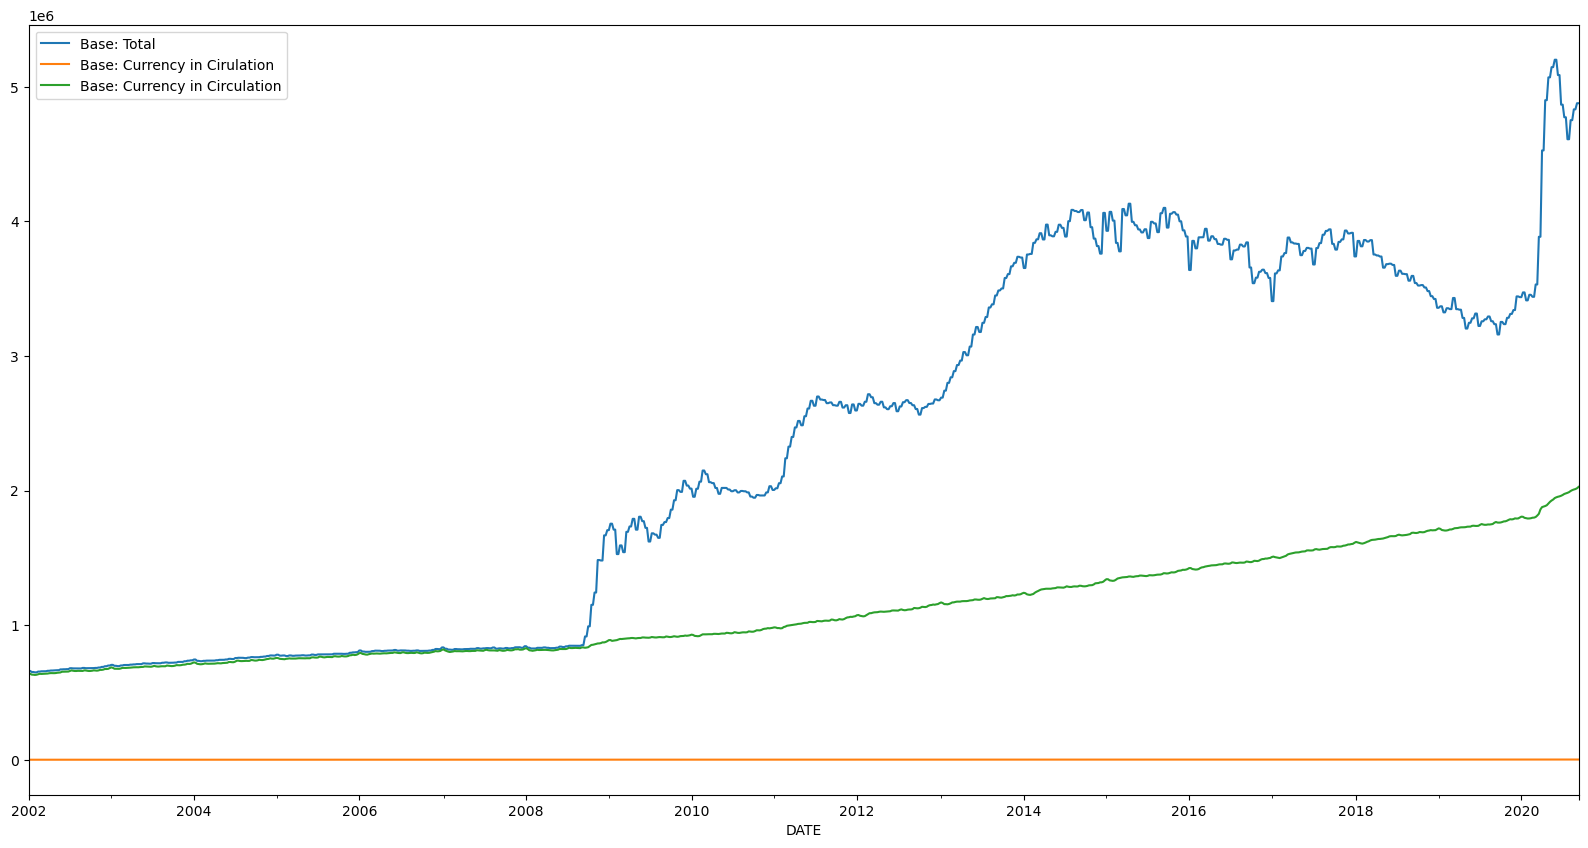

In [7]:
fig, ax=plt.subplots(figsize = (20,10))
data.plot.line(ax=ax)

Text(0.5, 1.0, 'Currency in Circulation')

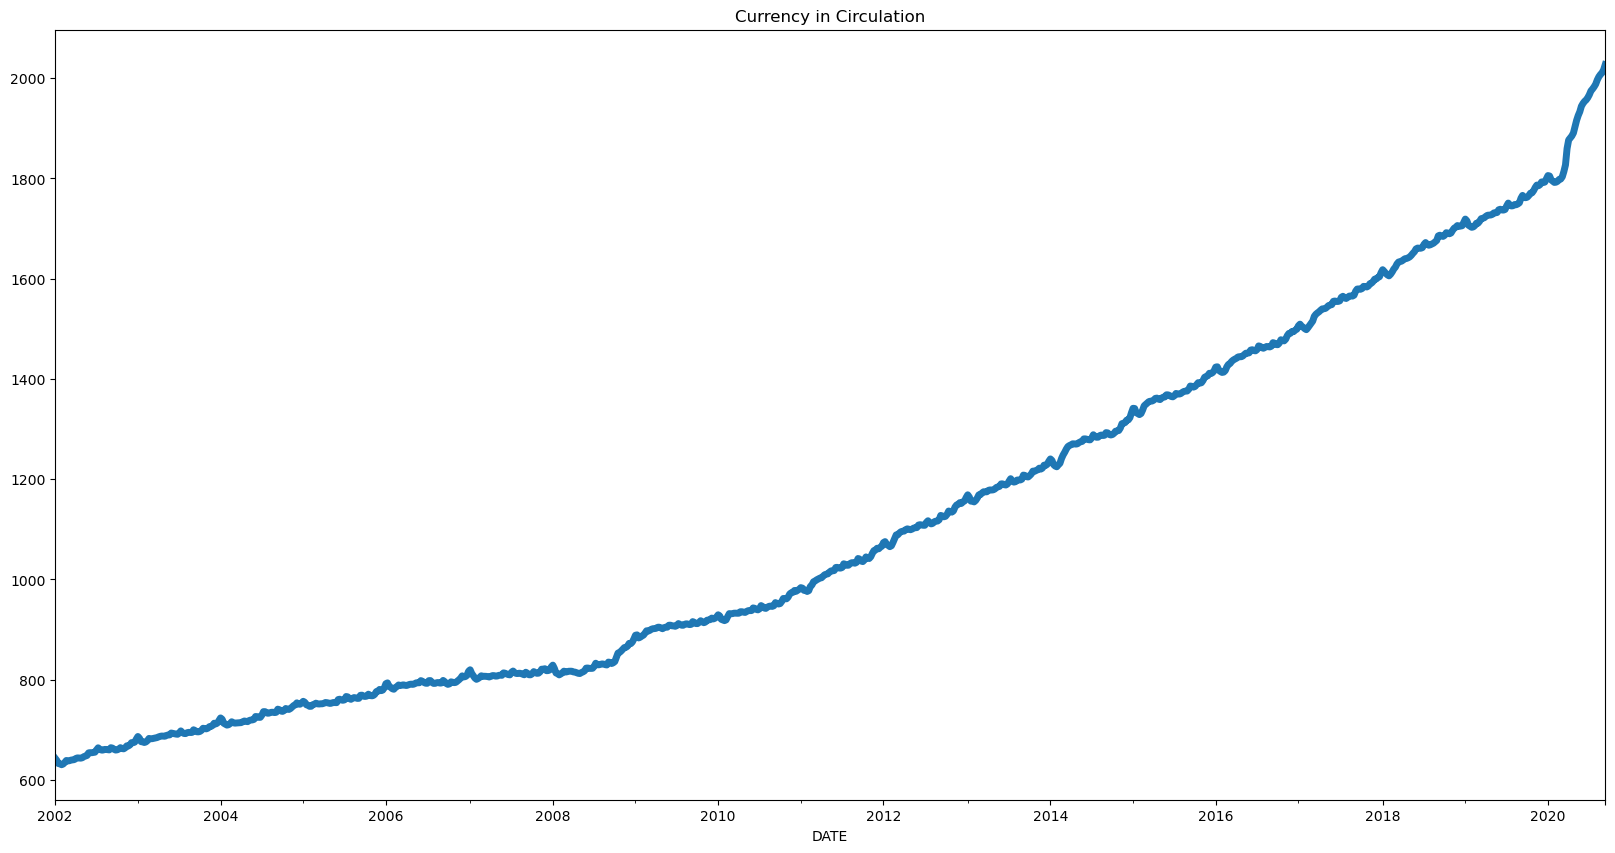

In [8]:
fig, ax=plt.subplots(figsize = (20,10))
data["Base: Currency in Cirulation"].plot.line(linewidth=5,ax=ax)
ax.set_title("Currency in Circulation")

In [38]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
data = gather_data(data_codes = data_codes,
                  start=start,
                  end=end,
                  freq="M")

In [39]:
data.to_csv("MonetaryData.csv")

## Merge two data sets, interest on reserves at Fed, with one overlapping date

In [40]:
plot_data = data[["Interest on Excess Reserves", "Interest on Reserve Balances"]]
match = plot_data[plot_data["Interest on Reserve Balances"]==plot_data["Interest on Excess Reserves"]]
match

Interest on Excess Reserves  Interest on Reserve Balances
DATE                                                                 
2021-07-31                         0.15                          0.15

In [41]:
match_date = match.index
match_val = match.sum(axis=1)/2
match_date, match_val

(DatetimeIndex(['2021-07-31'], dtype='datetime64[ns]', name='DATE', freq='M'),
 DATE
 2021-07-31    0.15
 Freq: M, dtype: float64)

In [42]:
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis =1)
plot_data.loc[match_date] = match_val

<AxesSubplot:xlabel='DATE'>

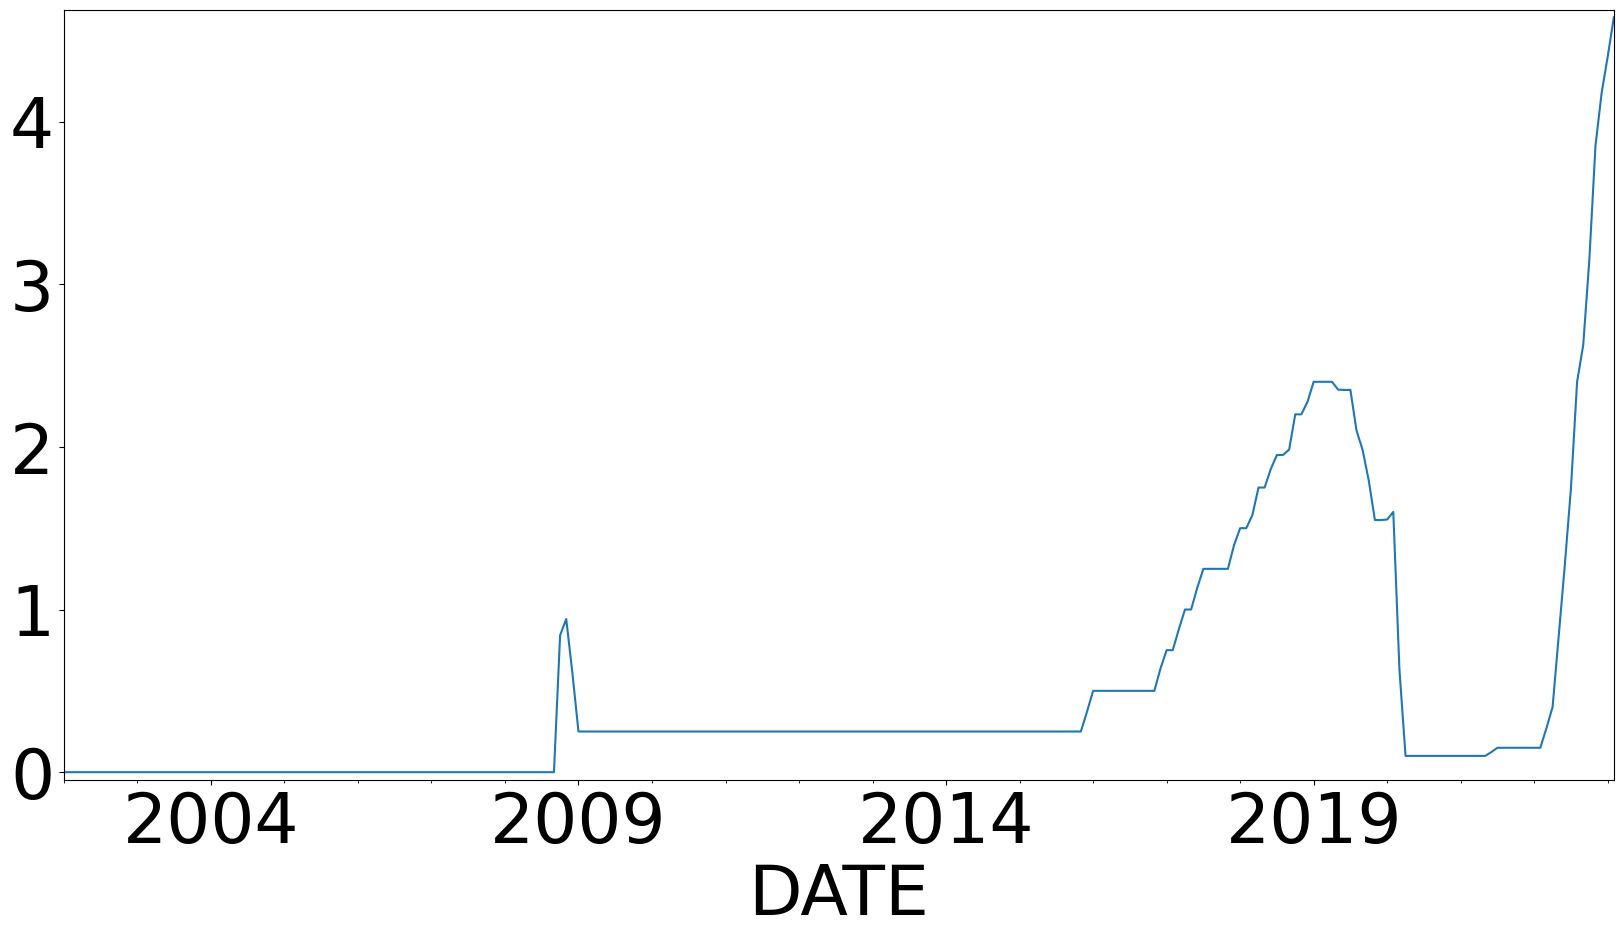

In [43]:
fig, ax=plt.subplots(figsize = (20,10))

plot_data.plot.line(ax=ax)

<AxesSubplot:xlabel='DATE'>

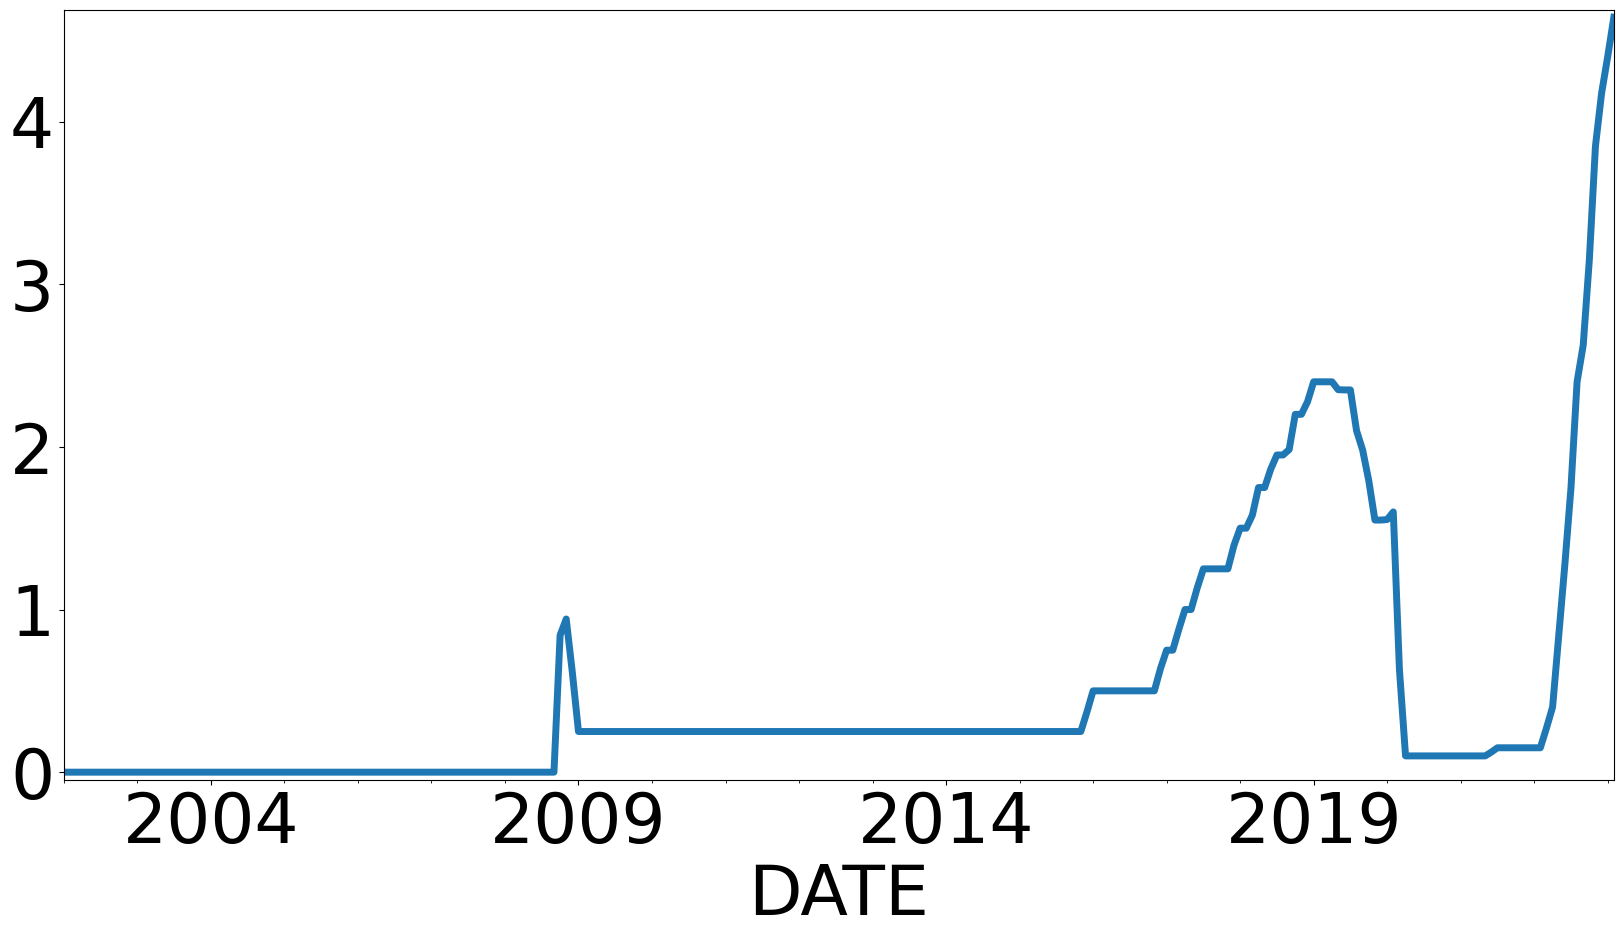

In [44]:
plot_data.loc[match_date]= match_val
fig, ax = plt.subplots(figsize = (20,10))

plot_data.plot.line(linewidth = 5, ax =ax)

In [45]:
plot_data

DATE
2002-01-31    0.000000
2002-02-28    0.000000
2002-03-31    0.000000
2002-04-30    0.000000
2002-05-31    0.000000
                ...   
2022-10-31    3.150000
2022-11-30    3.850000
2022-12-31    4.174194
2023-01-31    4.400000
2023-02-28    4.641071
Freq: M, Length: 254, dtype: float64

<AxesSubplot:xlabel='DATE'>

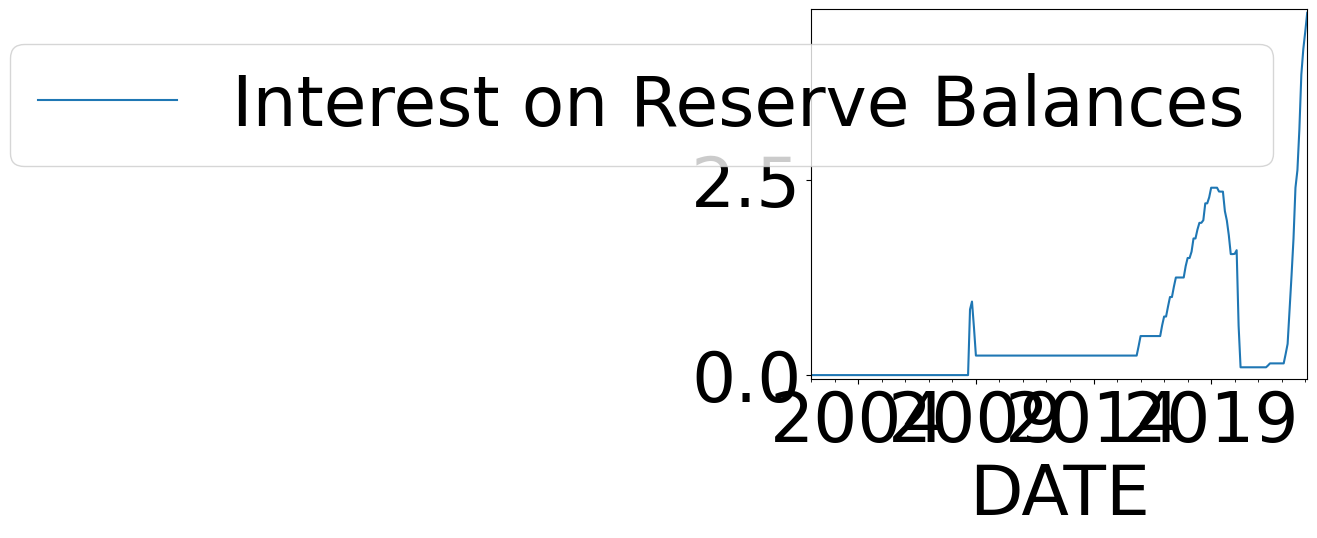

In [46]:
data["Interest on Reserve Balances"] = plot_data
data[["Interest on Reserve Balances"]].plot()

## Build Function to Plot Lines of data in dataframe

C:\Users\joeyw\AppData\Local\Temp\ipykernel_12292\1000717261.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2)for y in y_vals])


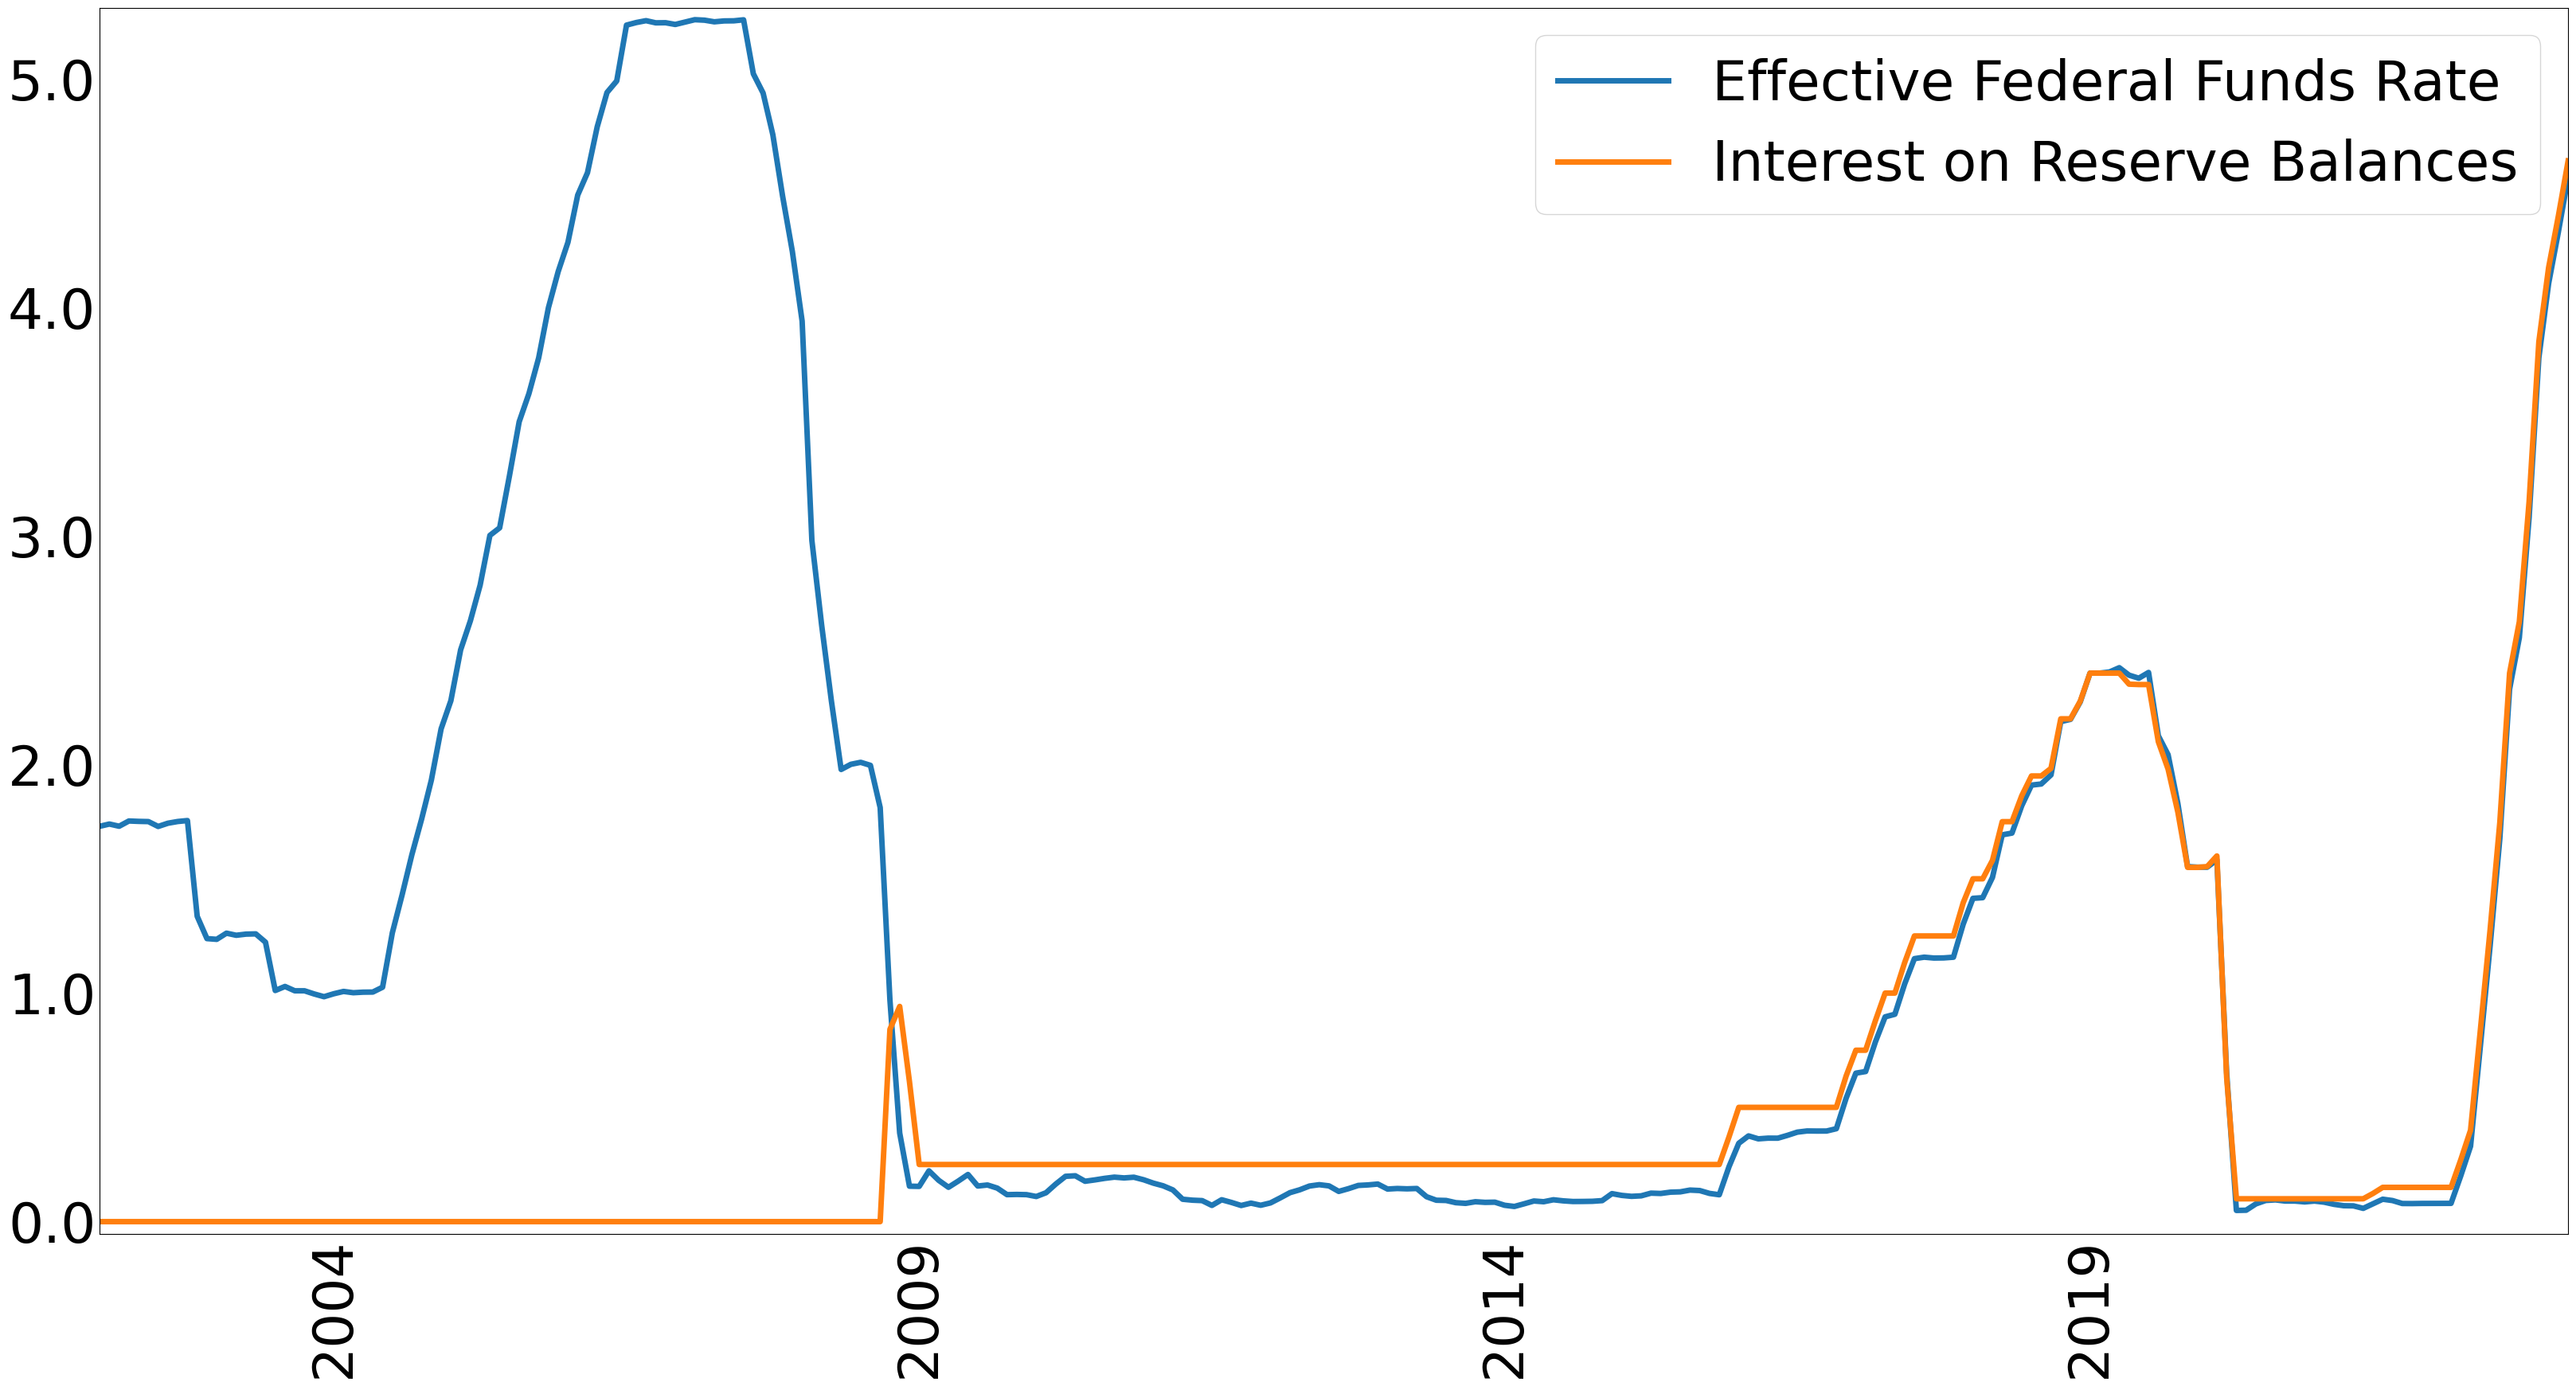

In [47]:
def plot_lines(df,
              linewidth=5,
              figsize=(40,20),
              secondeary_y = None,
              legend =True,
              pp=None,
              save_fig=False,
              global_fontsize=50):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax= plt.subplots(figsize=figsize)
    df.dropna(axis=0,how="all").plot.line(
        linewidth = linewidth,
        ax=ax,
        legend=legend)
    # remove label "Date"
    ax.set_xlabel("")
    ax.tick_params(axis="x", rotation=90)
    ax.tick_params(length=0,which='both')
    # round axis tick values
    y_vals=ax.get_yticks()
    ax.set_yticklabels([round(y,2)for y in y_vals])
    #save figure as file
    remove_chars="[]:$'\\'"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename=filename.replace(char,"")
    if save_fig:
        folder="Monetary Plots"
        try:
            os.mkdir("plots")
        except:
            pass
        plt.savefig(folder+"/"+filename[:50]+" line.png", bbox_inches = "tight")
    return fig,ax
fig,ax = plot_lines(data[["Effective Federal Funds Rate","Interest on Reserve Balances"]],save_fig=True)

## Monetary Base

In [48]:
data["Interest on Reserves"] = data["Interest on Excess Reserves"].fillna(0).add(data["Interest on Reserve Balances"].fillna(0))
bil_to_mil_list  = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)",
                    "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = data[key].mul(10 **3)

In [49]:
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
plot_data= data[money_vars]
plot_data

Base: Total ($ Mil)  Base: Currency in Circulation ($ Mil)  \
DATE                                                                     
2002-01-31             653800.0                              635429.00   
2002-02-28             654600.0                              635884.00   
2002-03-31             659000.0                              639697.50   
2002-04-30             663400.0                              643579.50   
2002-05-31             668600.0                              648293.20   
...                         ...                                    ...   
2022-10-31            5339600.0                             2283799.00   
2022-11-30            5418700.0                             2291416.00   
2022-12-31            5405400.0                             2297343.50   
2023-01-31            5328400.0                             2299897.25   
2023-02-28            5321000.0                             2297460.75   

            Balance Sheet: Excess Reserves ($ Mil)  
DATE                                                
2002-01-31                                 1446.20  
2002-02-28                                 1377.25  
2002-03-31                                 1370.25  
2002-04-30                                 1263.50  
2002-05-31                                 1256.20  
...                                            ...  
2022-10-31                                     NaN  
2022-11-30                                     NaN  
2022-12-31                                     NaN  
2023-01-31                                     NaN  
2023-02-28                                     NaN  

[254 rows x 3 columns]

C:\Users\joeyw\AppData\Local\Temp\ipykernel_12292\1000717261.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2)for y in y_vals])


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot:>)

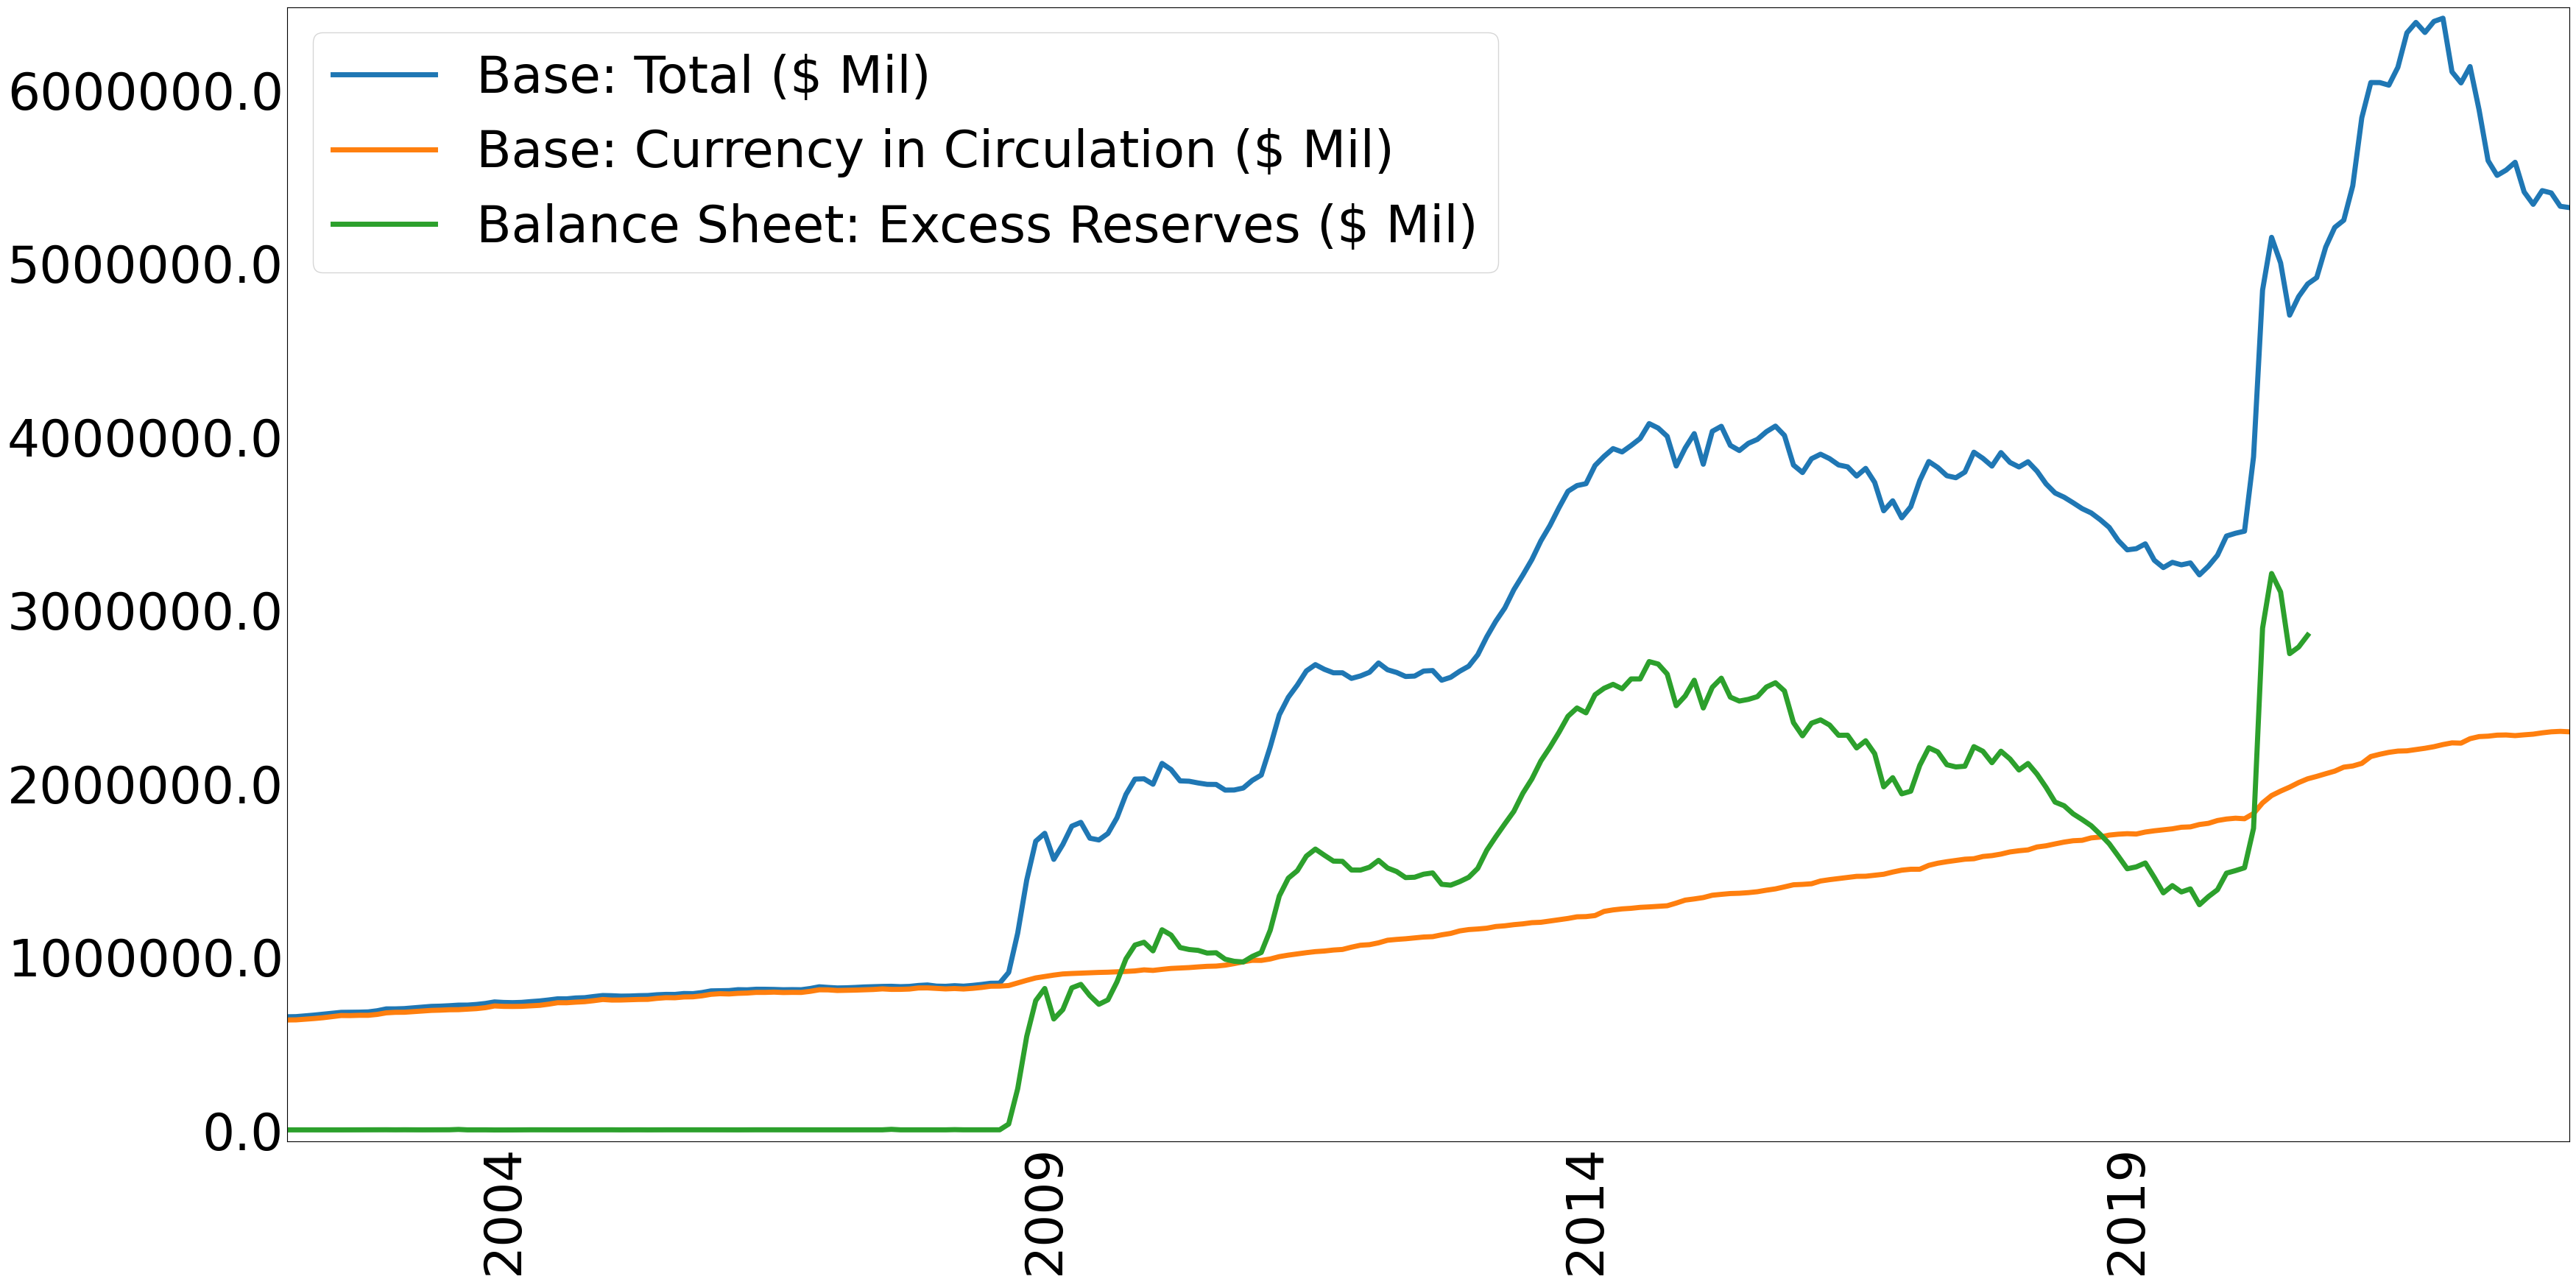

In [50]:
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20), pp = None)

## Stacked lines

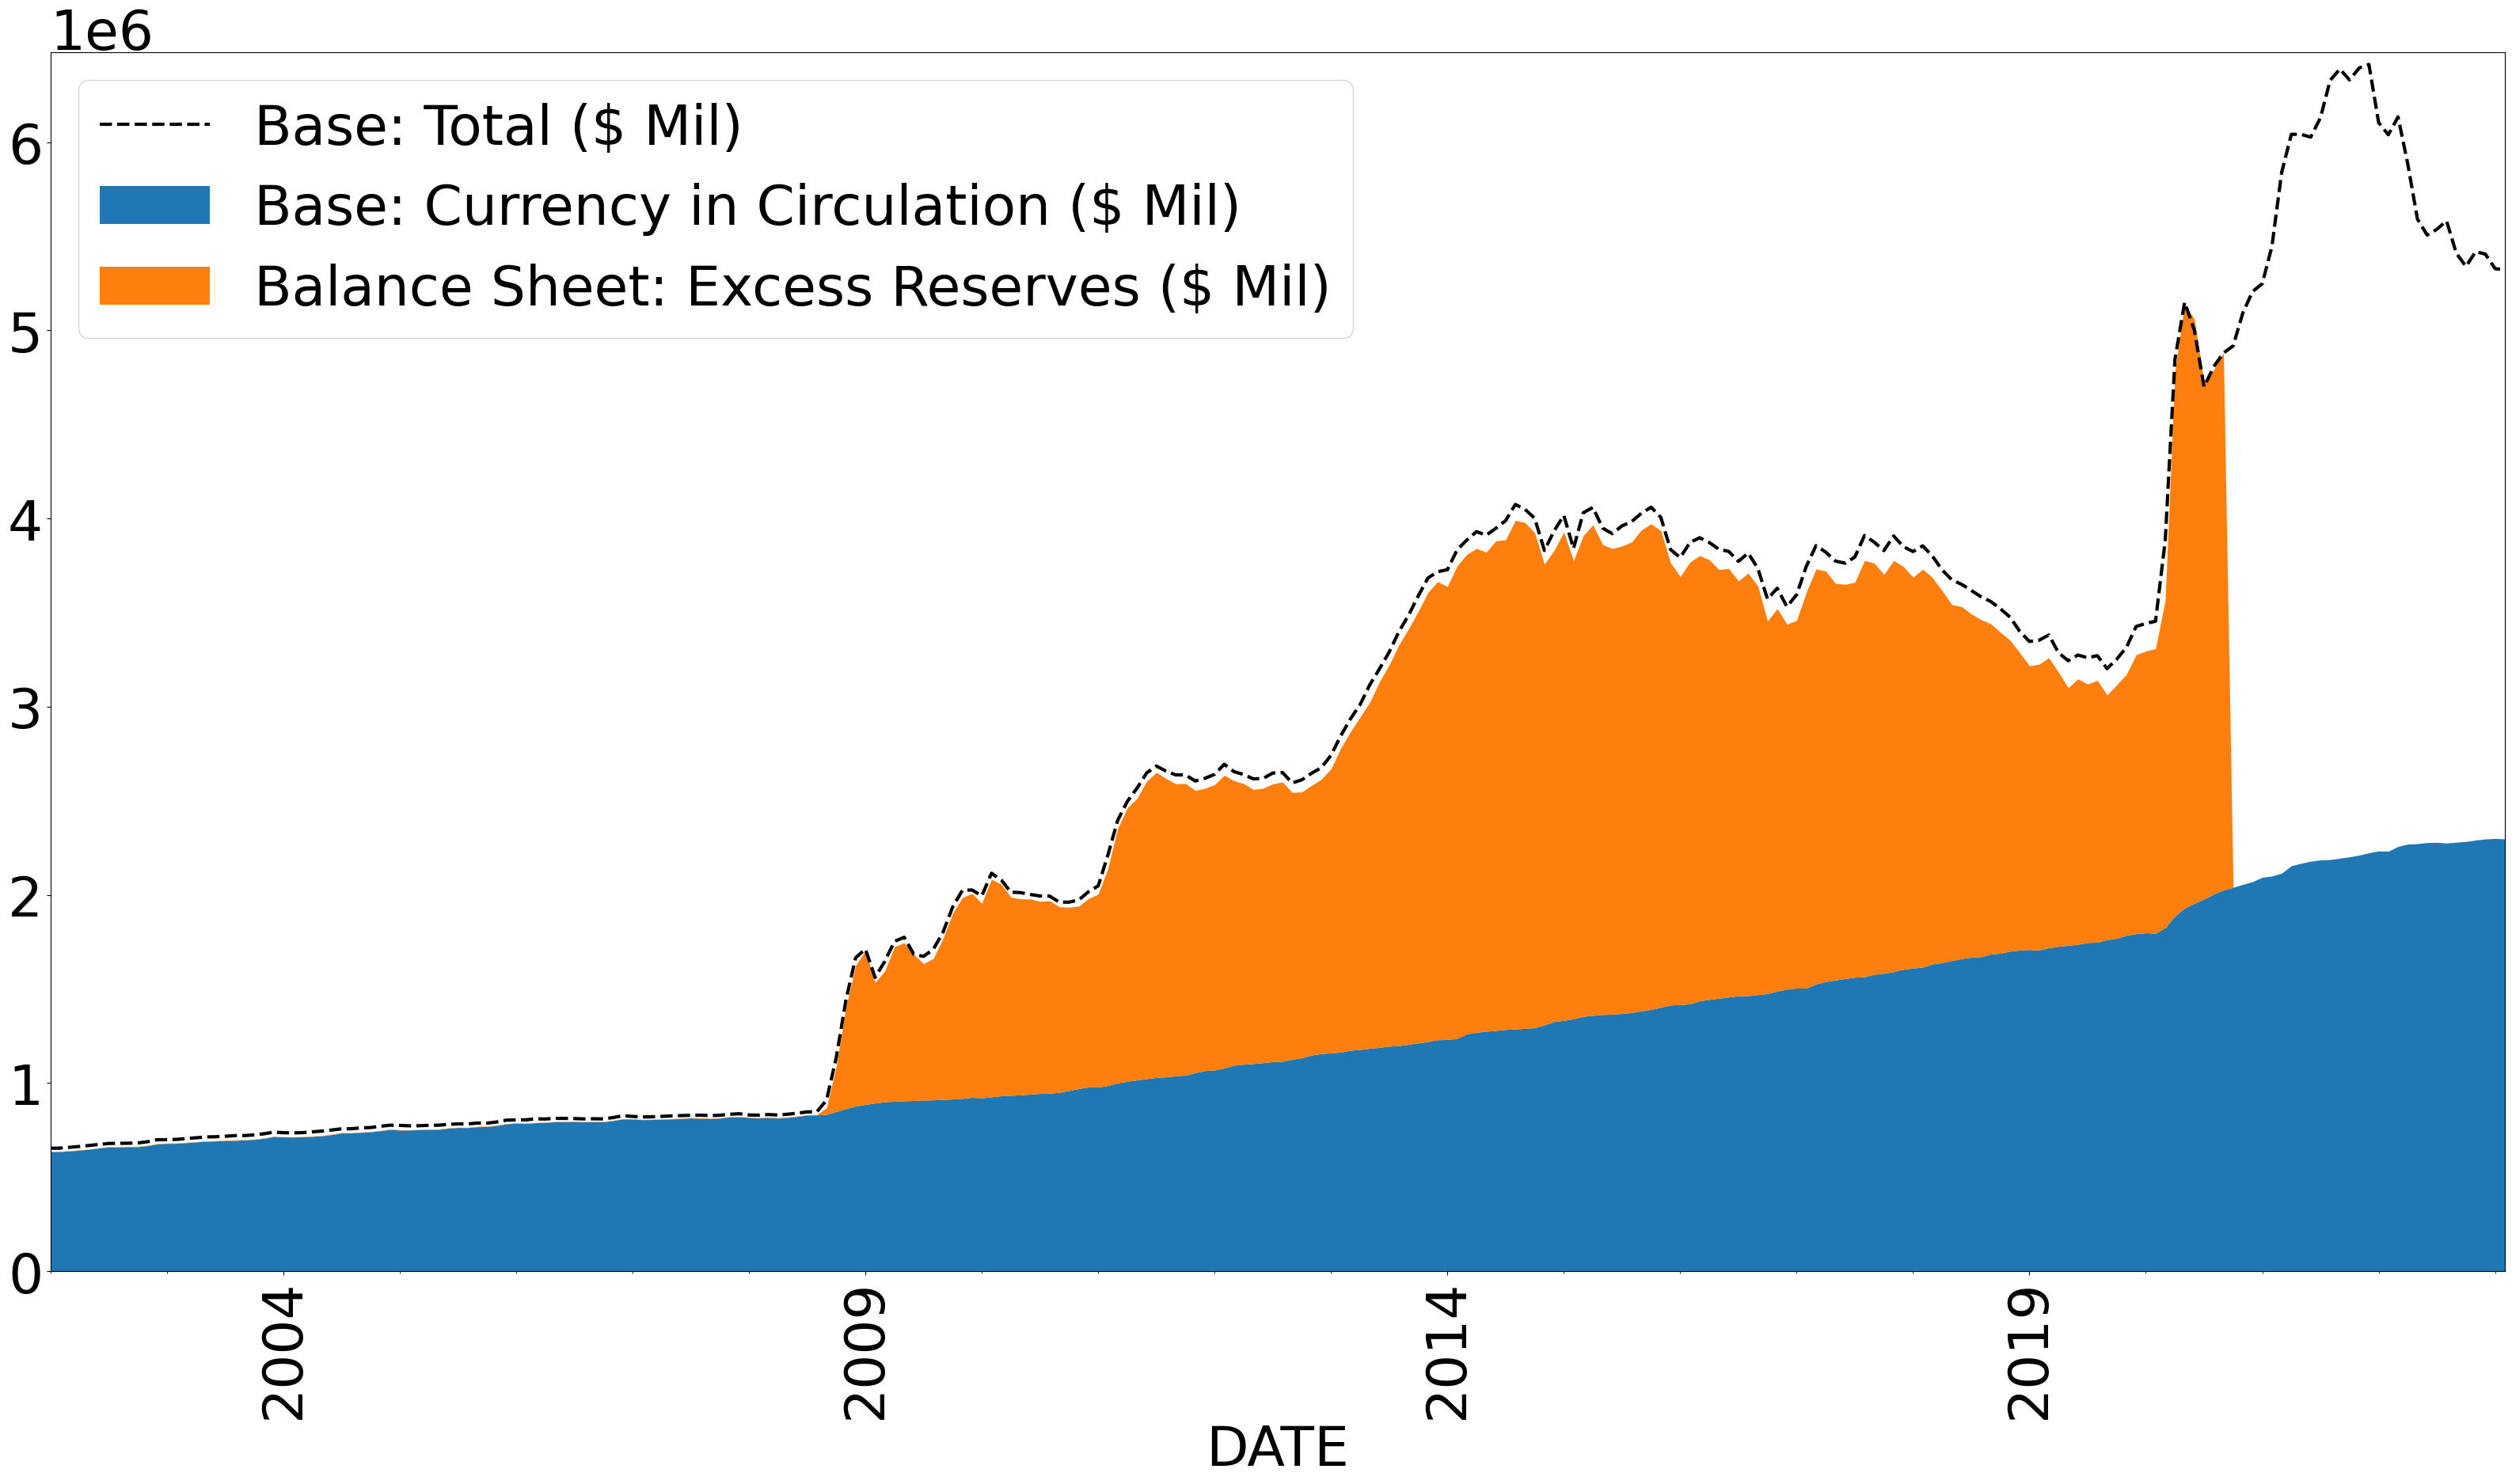

In [51]:
def plot_stacked(df, 
                stack_vars, 
                linewidth = 3, 
                figsize = (40,20),  
                total_var = False,
                global_fontsize=50,
                ncol=1):
    plt.rcParams['axes.ymargin'] = 0.01
    plt.rcParams['axes.xmargin'] = 0.00
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    if total_var != False:
        df[total_var].plot.line(
            linewidth = linewidth, 
            ax = ax, 
            c = "k",
            label = total_var, 
            ls = "--")
  
    area_df=df[stack_vars]
    area_df.plot.area(stacked = True, 
                linewidth = 0,
                            ax = ax)
    ax.legend(loc=2,ncol=ncol)
    plt.xticks(rotation=90)
    return fig,ax
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
stack_vars= money_vars[1:]
total_var = money_vars[0]
fig, ax = plot_stacked(df = data,
             stack_vars=stack_vars,
             total_var=total_var)

In [23]:
money_vars = money_vars + ["Balance Sheet: Required Reserves ($ Mil)"]
money_vars

['Base: Total ($ Mil)',
 'Base: Currency in Circulation ($ Mil)',
 'Balance Sheet: Excess Reserves ($ Mil)',
 'Balance Sheet: Required Reserves ($ Mil)']

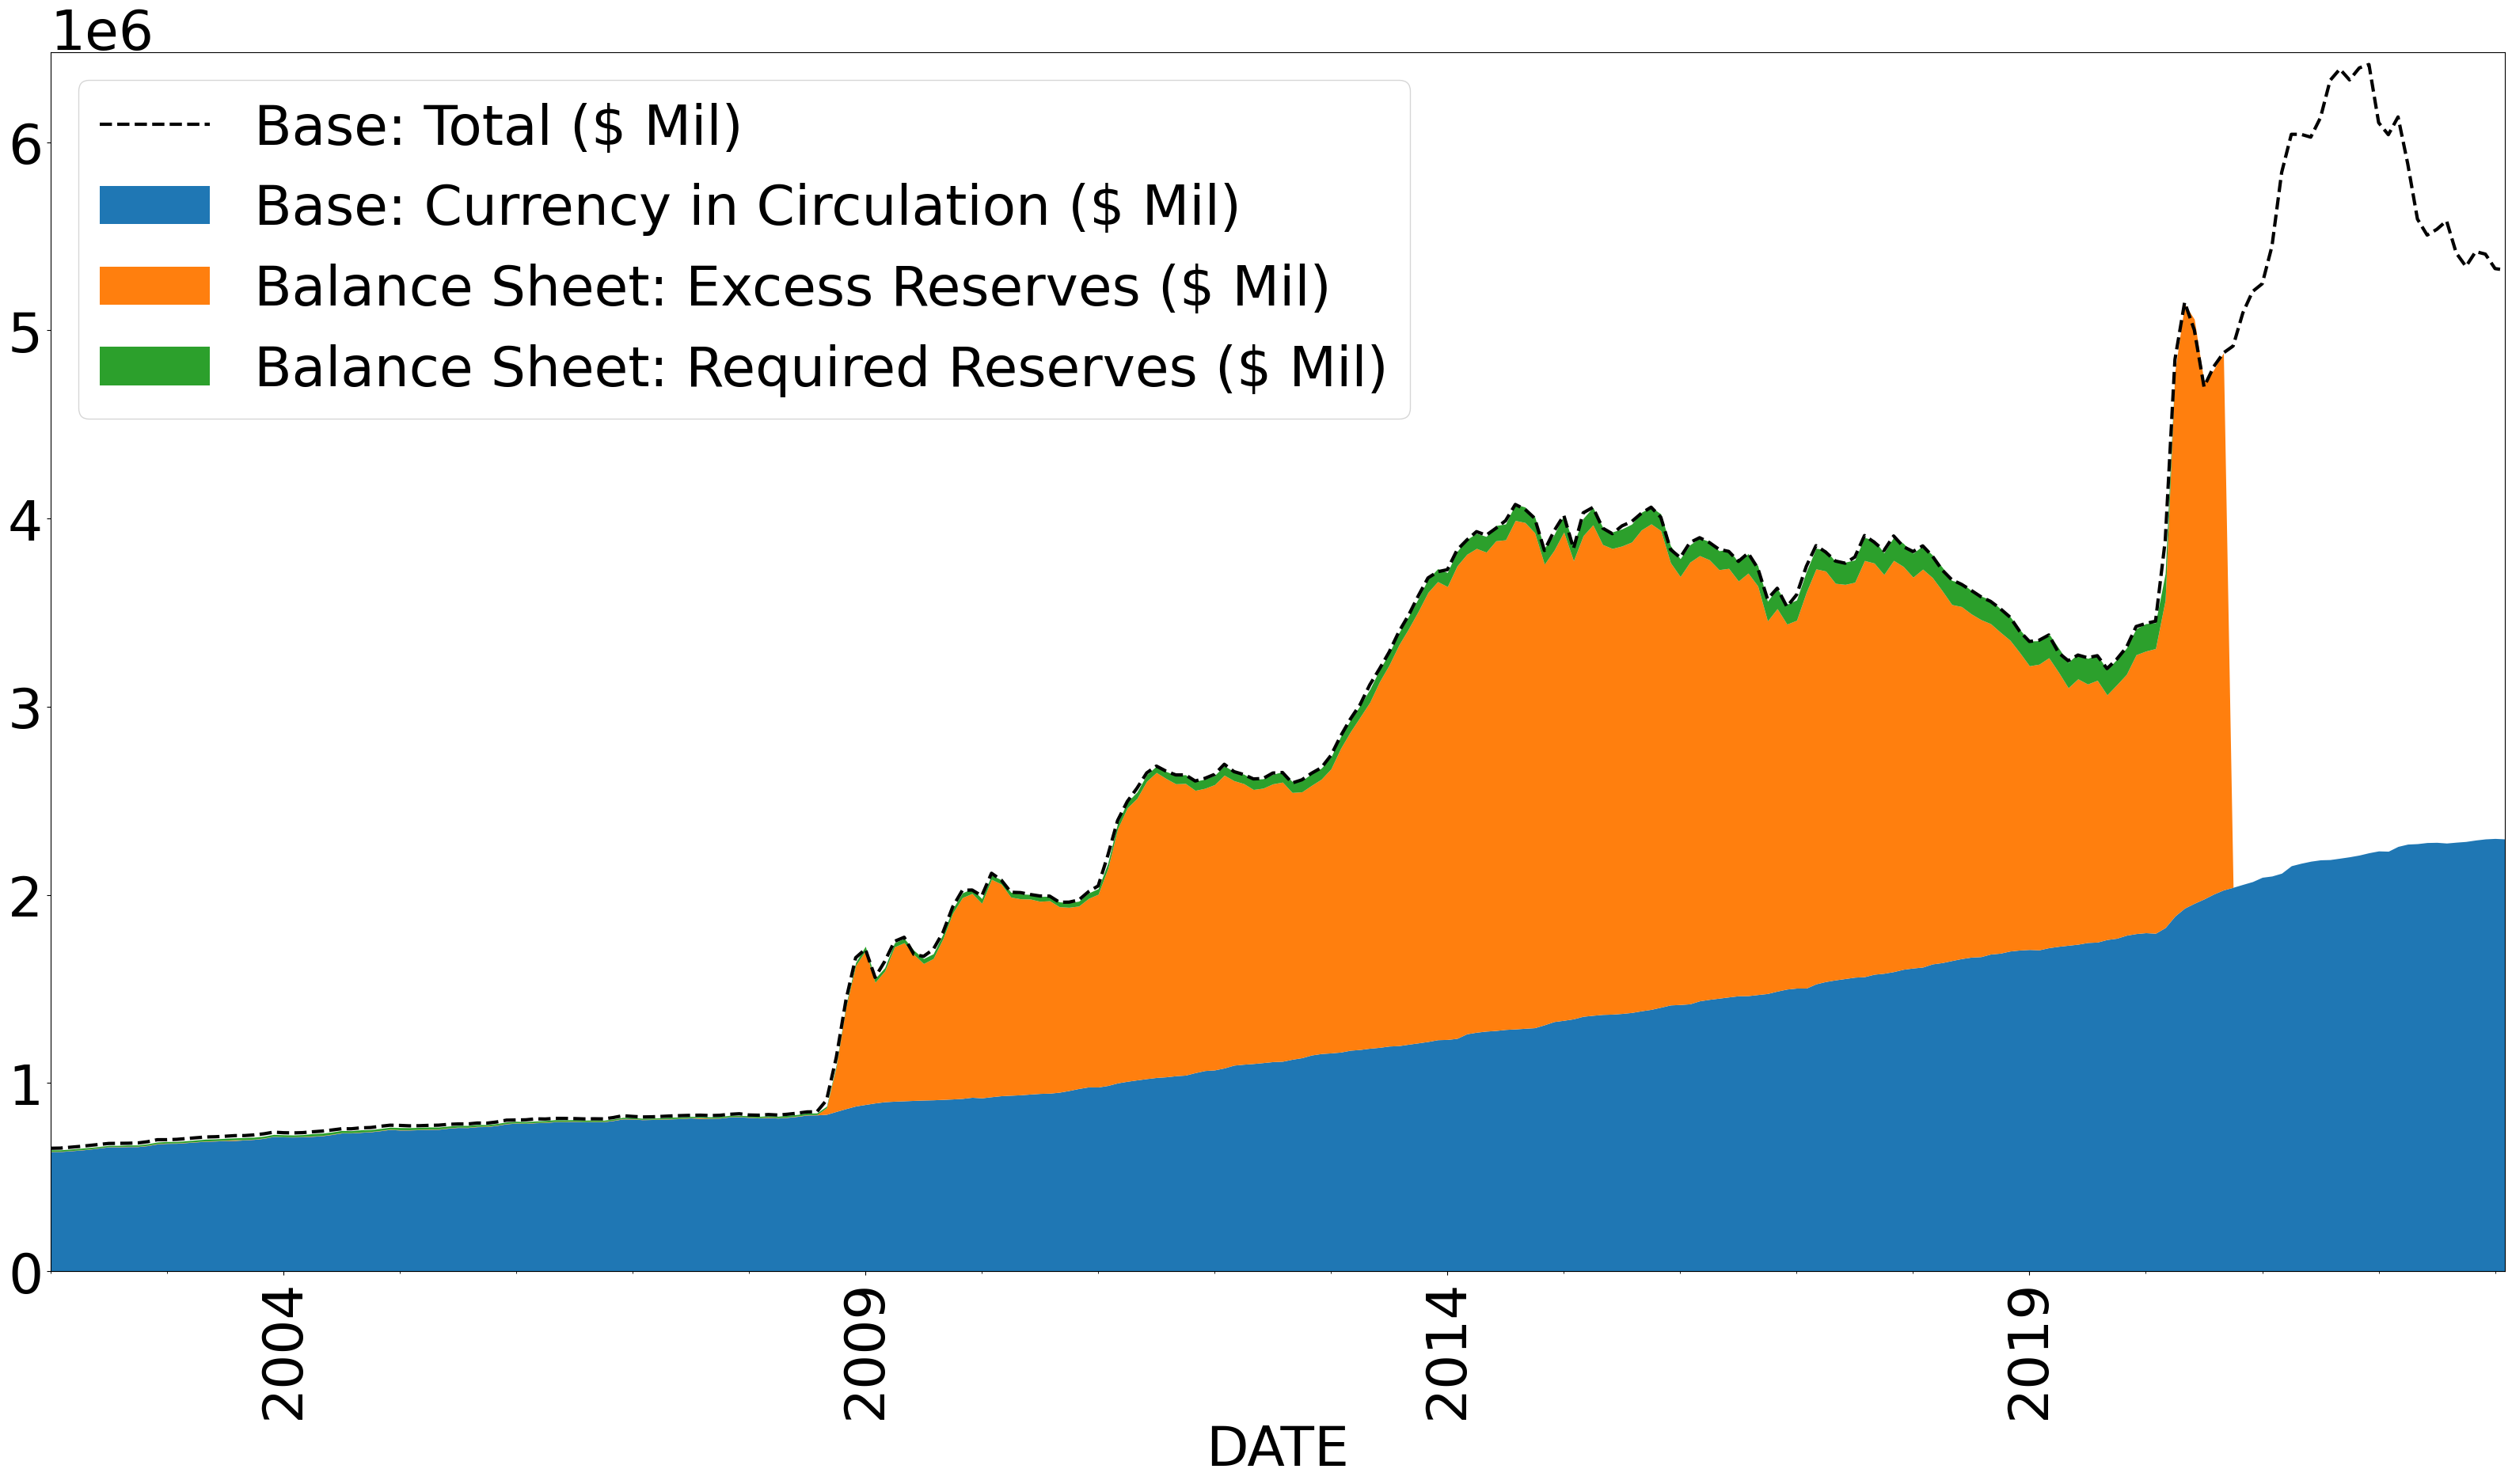

In [24]:
stack_vars=money_vars[1:]
fig, ax = plot_stacked(df = data,
             stack_vars=stack_vars,
             total_var=total_var)

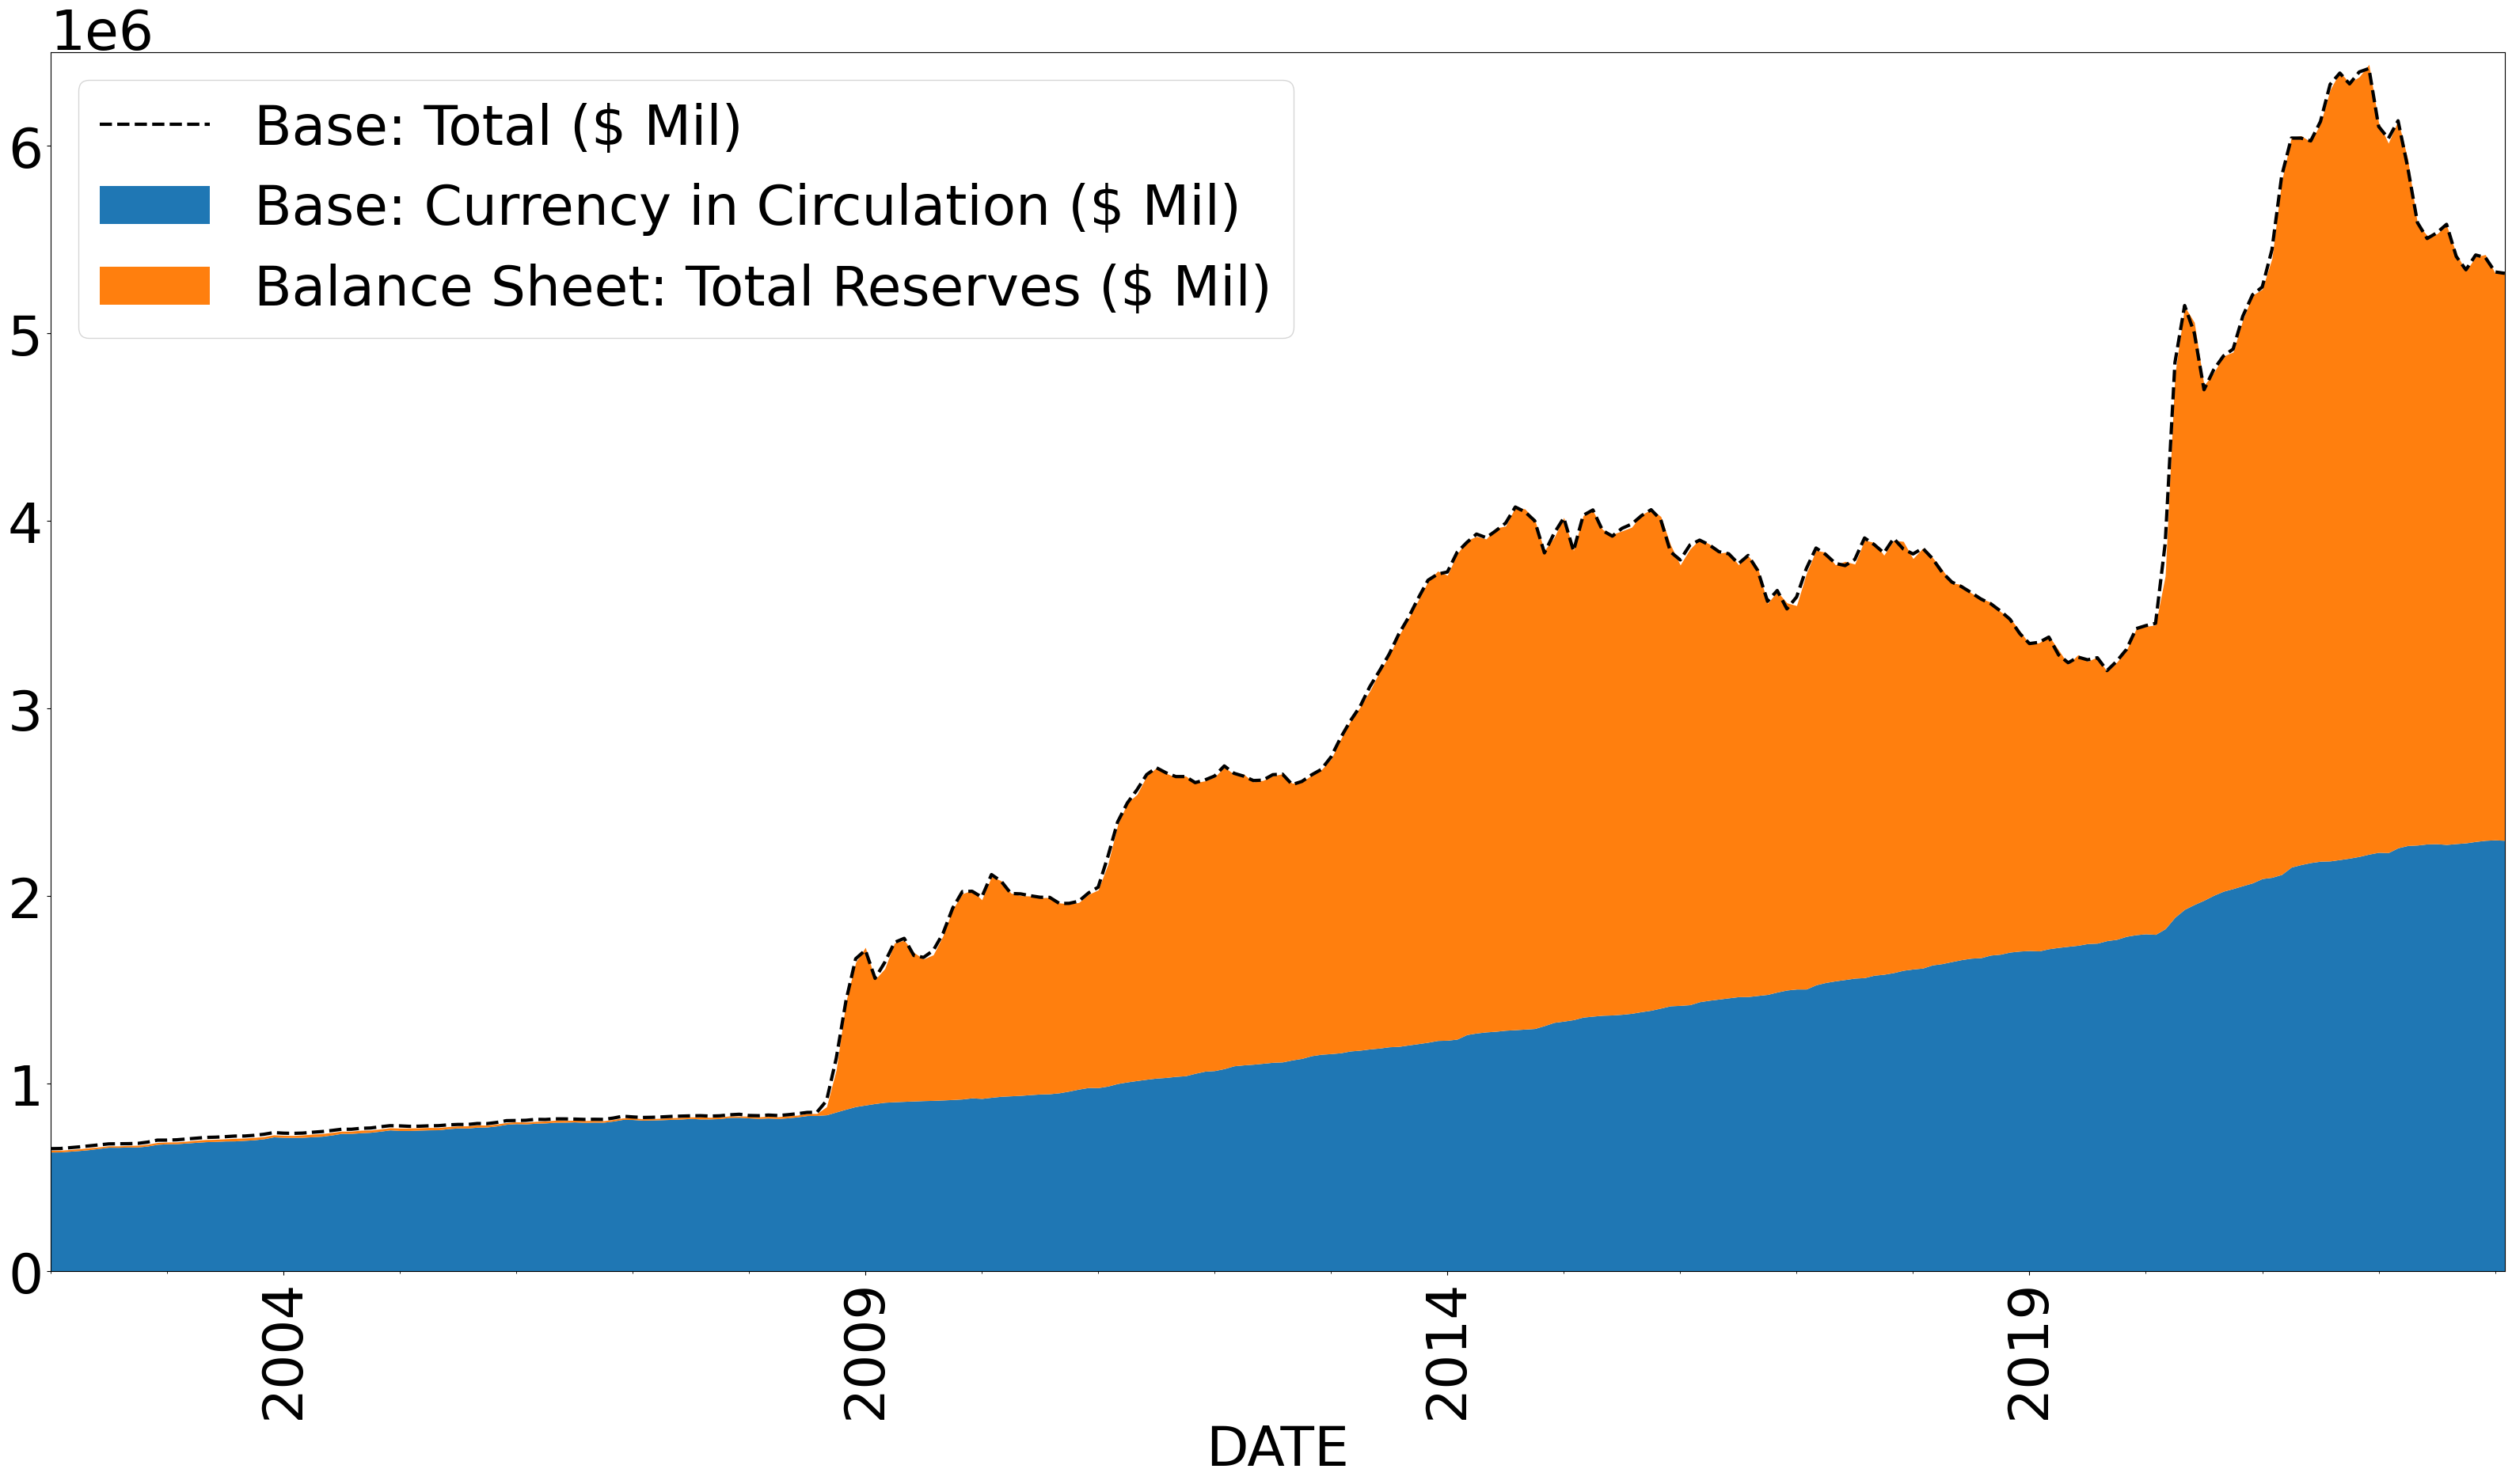

In [25]:
stack_vars= ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Total Reserves ($ Mil)"]
fig, ax = plot_stacked(df = data,
             stack_vars=stack_vars,
             total_var=total_var)

C:\Users\joeyw\AppData\Local\Temp\ipykernel_12292\1000717261.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2)for y in y_vals])


(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot:>)

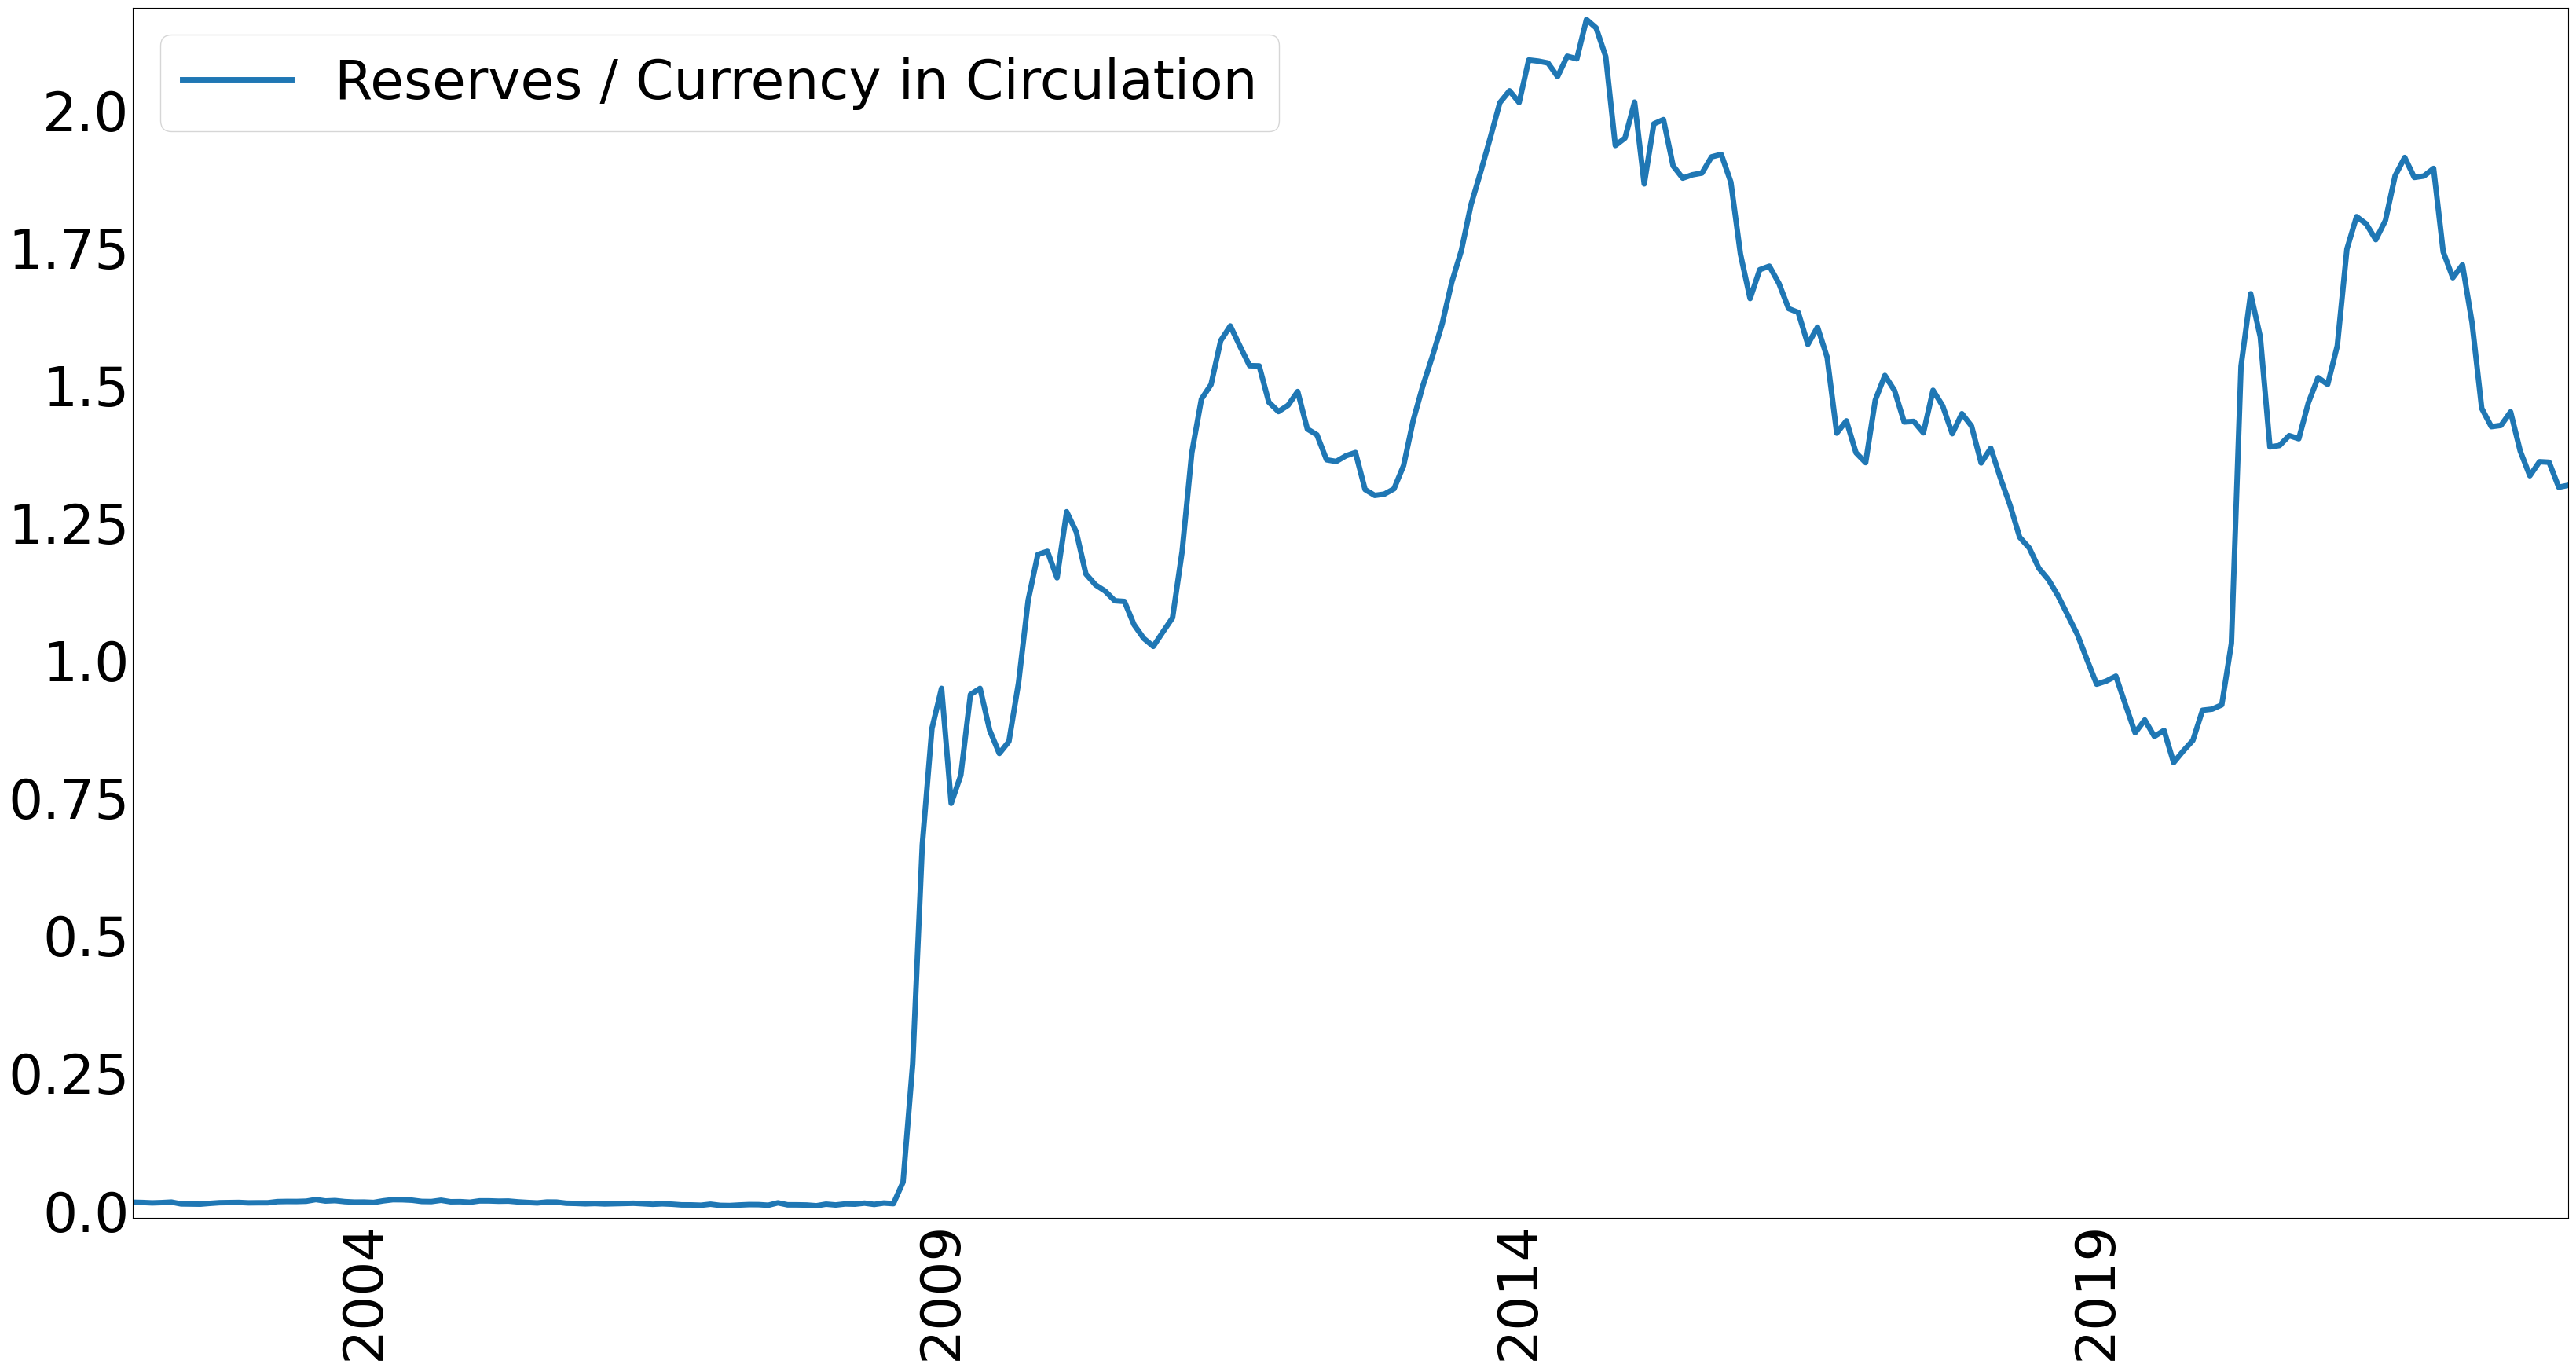

In [26]:
data["Reserves / Currency in Circulation"] = data["Balance Sheet: Total Reserves ($ Mil)"].div(
    data["Base: Currency in Circulation ($ Mil)"])
reserve_vars = ["Reserves / Currency in Circulation"]
plot_df=data[reserve_vars]
plot_lines(plot_df)

(<Figure size 4000x2000 with 1 Axes>, <AxesSubplot:xlabel='DATE'>)

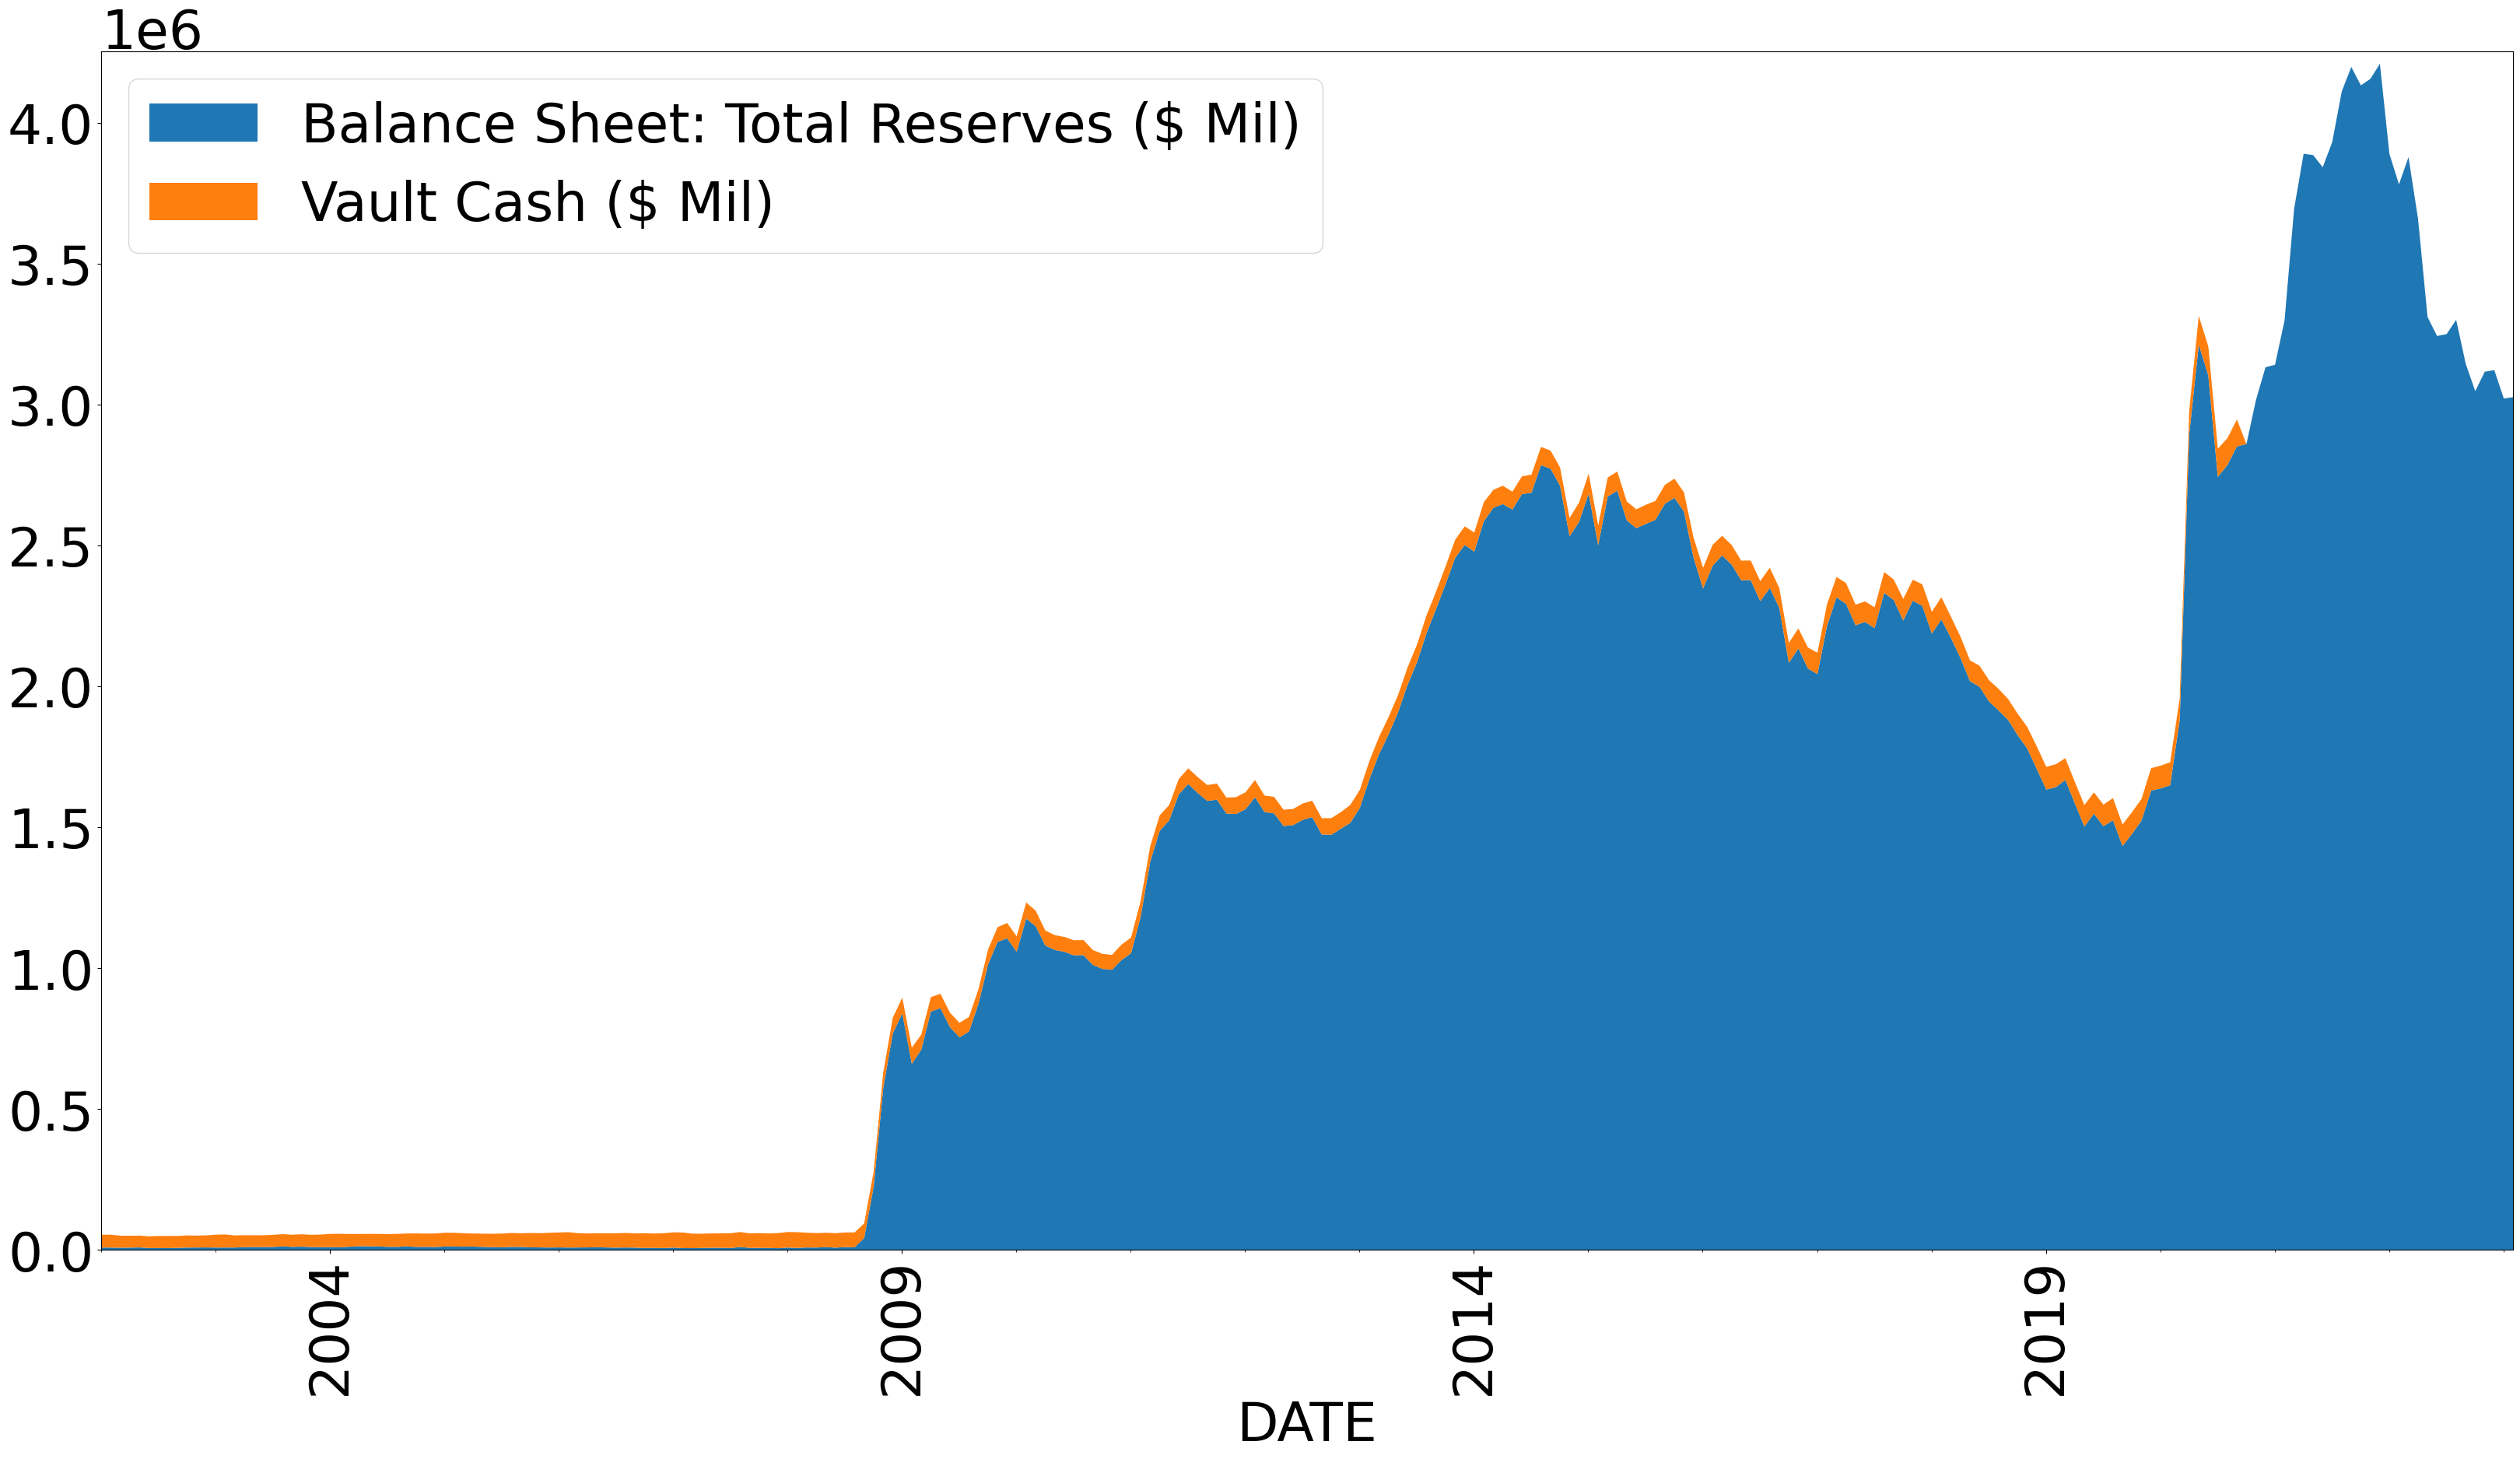

In [27]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Vault Cash ($ Mil)"]
plot_stacked(data, reserve_vars)

In [28]:
plot_data

Base: Total ($ Mil)  Base: Currency in Circulation ($ Mil)  \
DATE                                                                     
2002-01-31             653800.0                              635429.00   
2002-02-28             654600.0                              635884.00   
2002-03-31             659000.0                              639697.50   
2002-04-30             663400.0                              643579.50   
2002-05-31             668600.0                              648293.20   
...                         ...                                    ...   
2022-10-31            5339600.0                             2283799.00   
2022-11-30            5418700.0                             2291416.00   
2022-12-31            5405400.0                             2297343.50   
2023-01-31            5328400.0                             2299897.25   
2023-02-28            5321000.0                             2297460.75   

            Balance Sheet: Excess Reserves ($ Mil)  
DATE                                                
2002-01-31                                 1446.20  
2002-02-28                                 1377.25  
2002-03-31                                 1370.25  
2002-04-30                                 1263.50  
2002-05-31                                 1256.20  
...                                            ...  
2022-10-31                                     NaN  
2022-11-30                                     NaN  
2022-12-31                                     NaN  
2023-01-31                                     NaN  
2023-02-28                                     NaN  

[254 rows x 3 columns]

## Assets

In [29]:
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
                "Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
stack_vars= account_vars[1:]
total_var = account_vars[0]
plot_data=data[account_vars].dropna()
plot_data

Balance Sheet: U.S. Treasuries Held Outright ($ Mil)  \
DATE                                                               
2002-12-31                                          629399.50      
2003-01-31                                          629406.00      
2003-02-28                                          631901.75      
2003-03-31                                          639158.25      
2003-04-30                                          645498.60      
...                                                       ...      
2022-10-31                                         5621114.50      
2022-11-30                                         5547311.00      
2022-12-31                                         5507528.50      
2023-01-31                                         5446620.25      
2023-02-28                                         5380827.00      

            Balance Sheet: Securities Held Outright ($ Mil)  \
DATE                                                          
2002-12-31                                        629409.50   
2003-01-31                                        629416.00   
2003-02-28                                        631911.75   
2003-03-31                                        639168.25   
2003-04-30                                        645508.60   
...                                                     ...   
2022-10-31                                       8316832.75   
2022-11-30                                       8222611.80   
2022-12-31                                       8162878.50   
2023-01-31                                       8085837.50   
2023-02-28                                       8006482.00   

            Balance Sheet: Federal Agency Debt Securities ($ Mil)  \
DATE                                                                
2002-12-31                                               10.0       
2003-01-31                                               10.0       
2003-02-28                                               10.0       
2003-03-31                                               10.0       
2003-04-30                                               10.0       
...                                                       ...       
2022-10-31                                             2347.0       
2022-11-30                                             2347.0       
2022-12-31                                             2347.0       
2023-01-31                                             2347.0       
2023-02-28                                             2347.0       

            Balance Sheet: Mortgage-Backed Securities ($ Mil)  
DATE                                                           
2002-12-31                                               0.00  
2003-01-31                                               0.00  
2003-02-28                                               0.00  
2003-03-31                                               0.00  
2003-04-30                                               0.00  
...                                                       ...  
2022-10-31                                         2693371.50  
2022-11-30                                         2672953.40  
2022-12-31                                         2653003.25  
2023-01-31                                         2636869.75  
2023-02-28                                         2623307.50  

[243 rows x 4 columns]

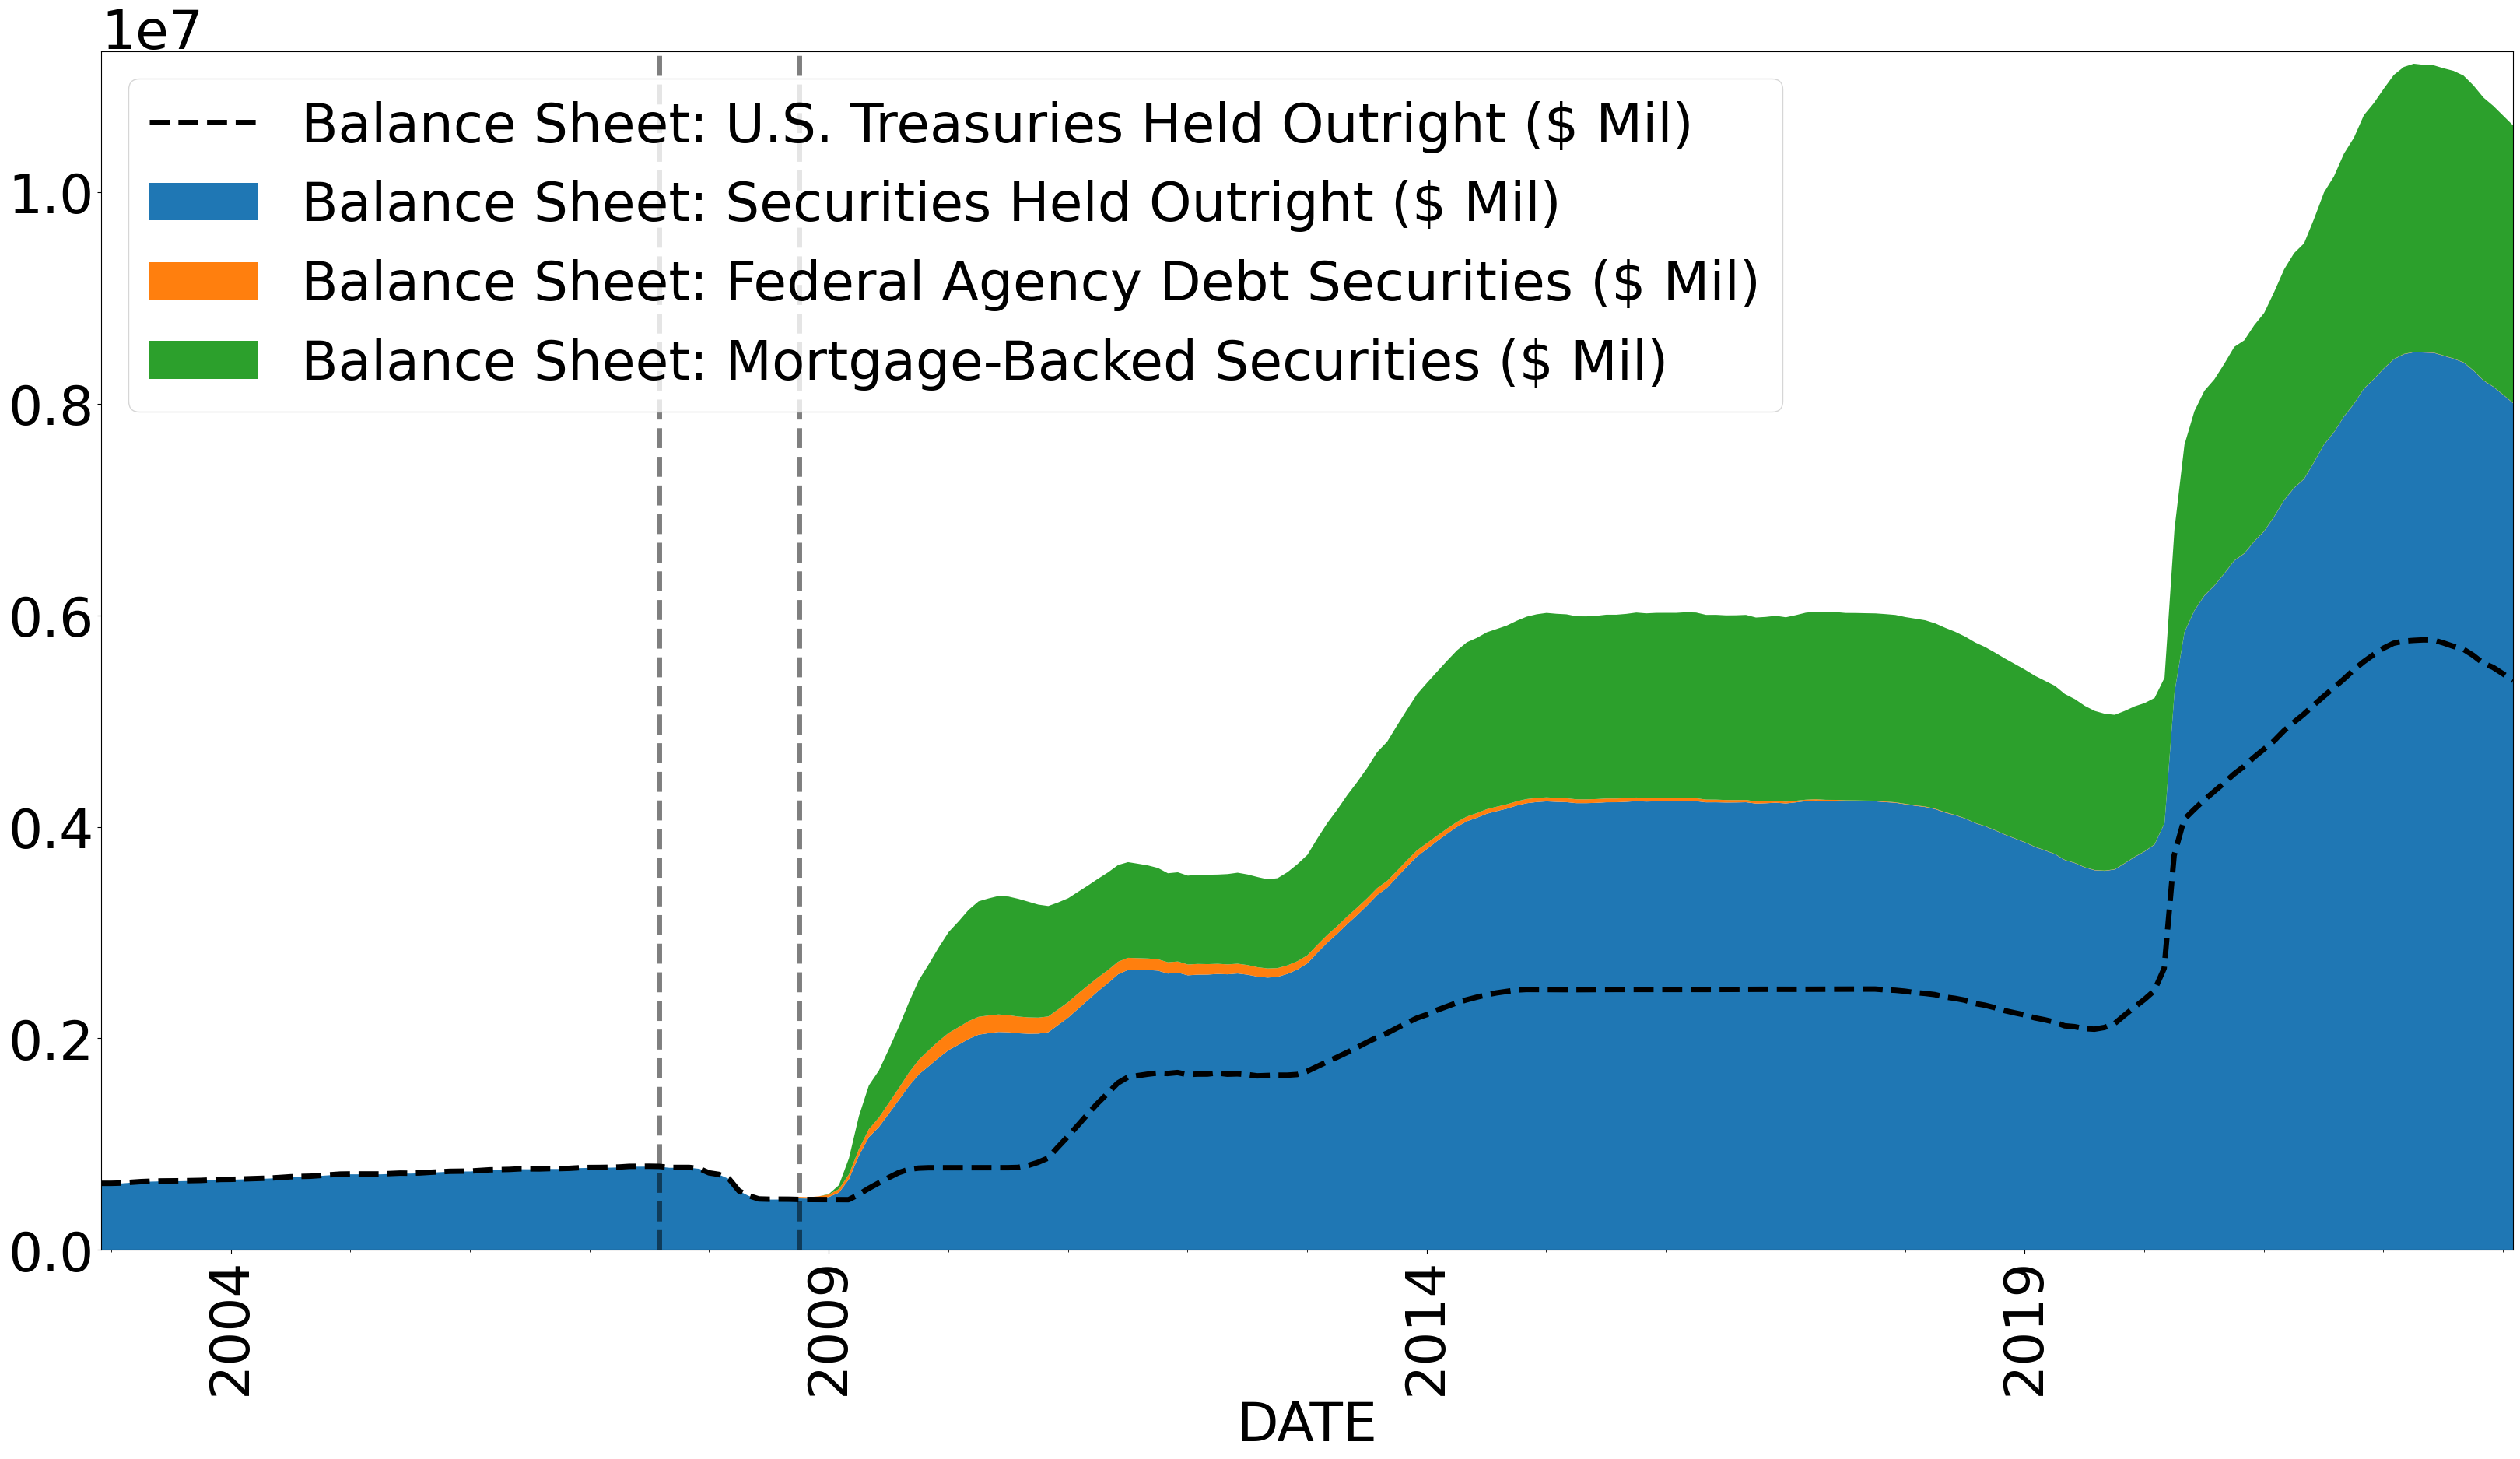

In [30]:
fig, ax=plot_stacked(df=plot_data,linewidth=5,
                     stack_vars = stack_vars,
                     total_var = total_var)
ax.axvline("2007-08-01", ls="--",color="k",linewidth=5,alpha=.5)
ax.axvline("2008-10-01", ls="--",color="k",linewidth=5,alpha=.5)

## From Securities to Remaining assests

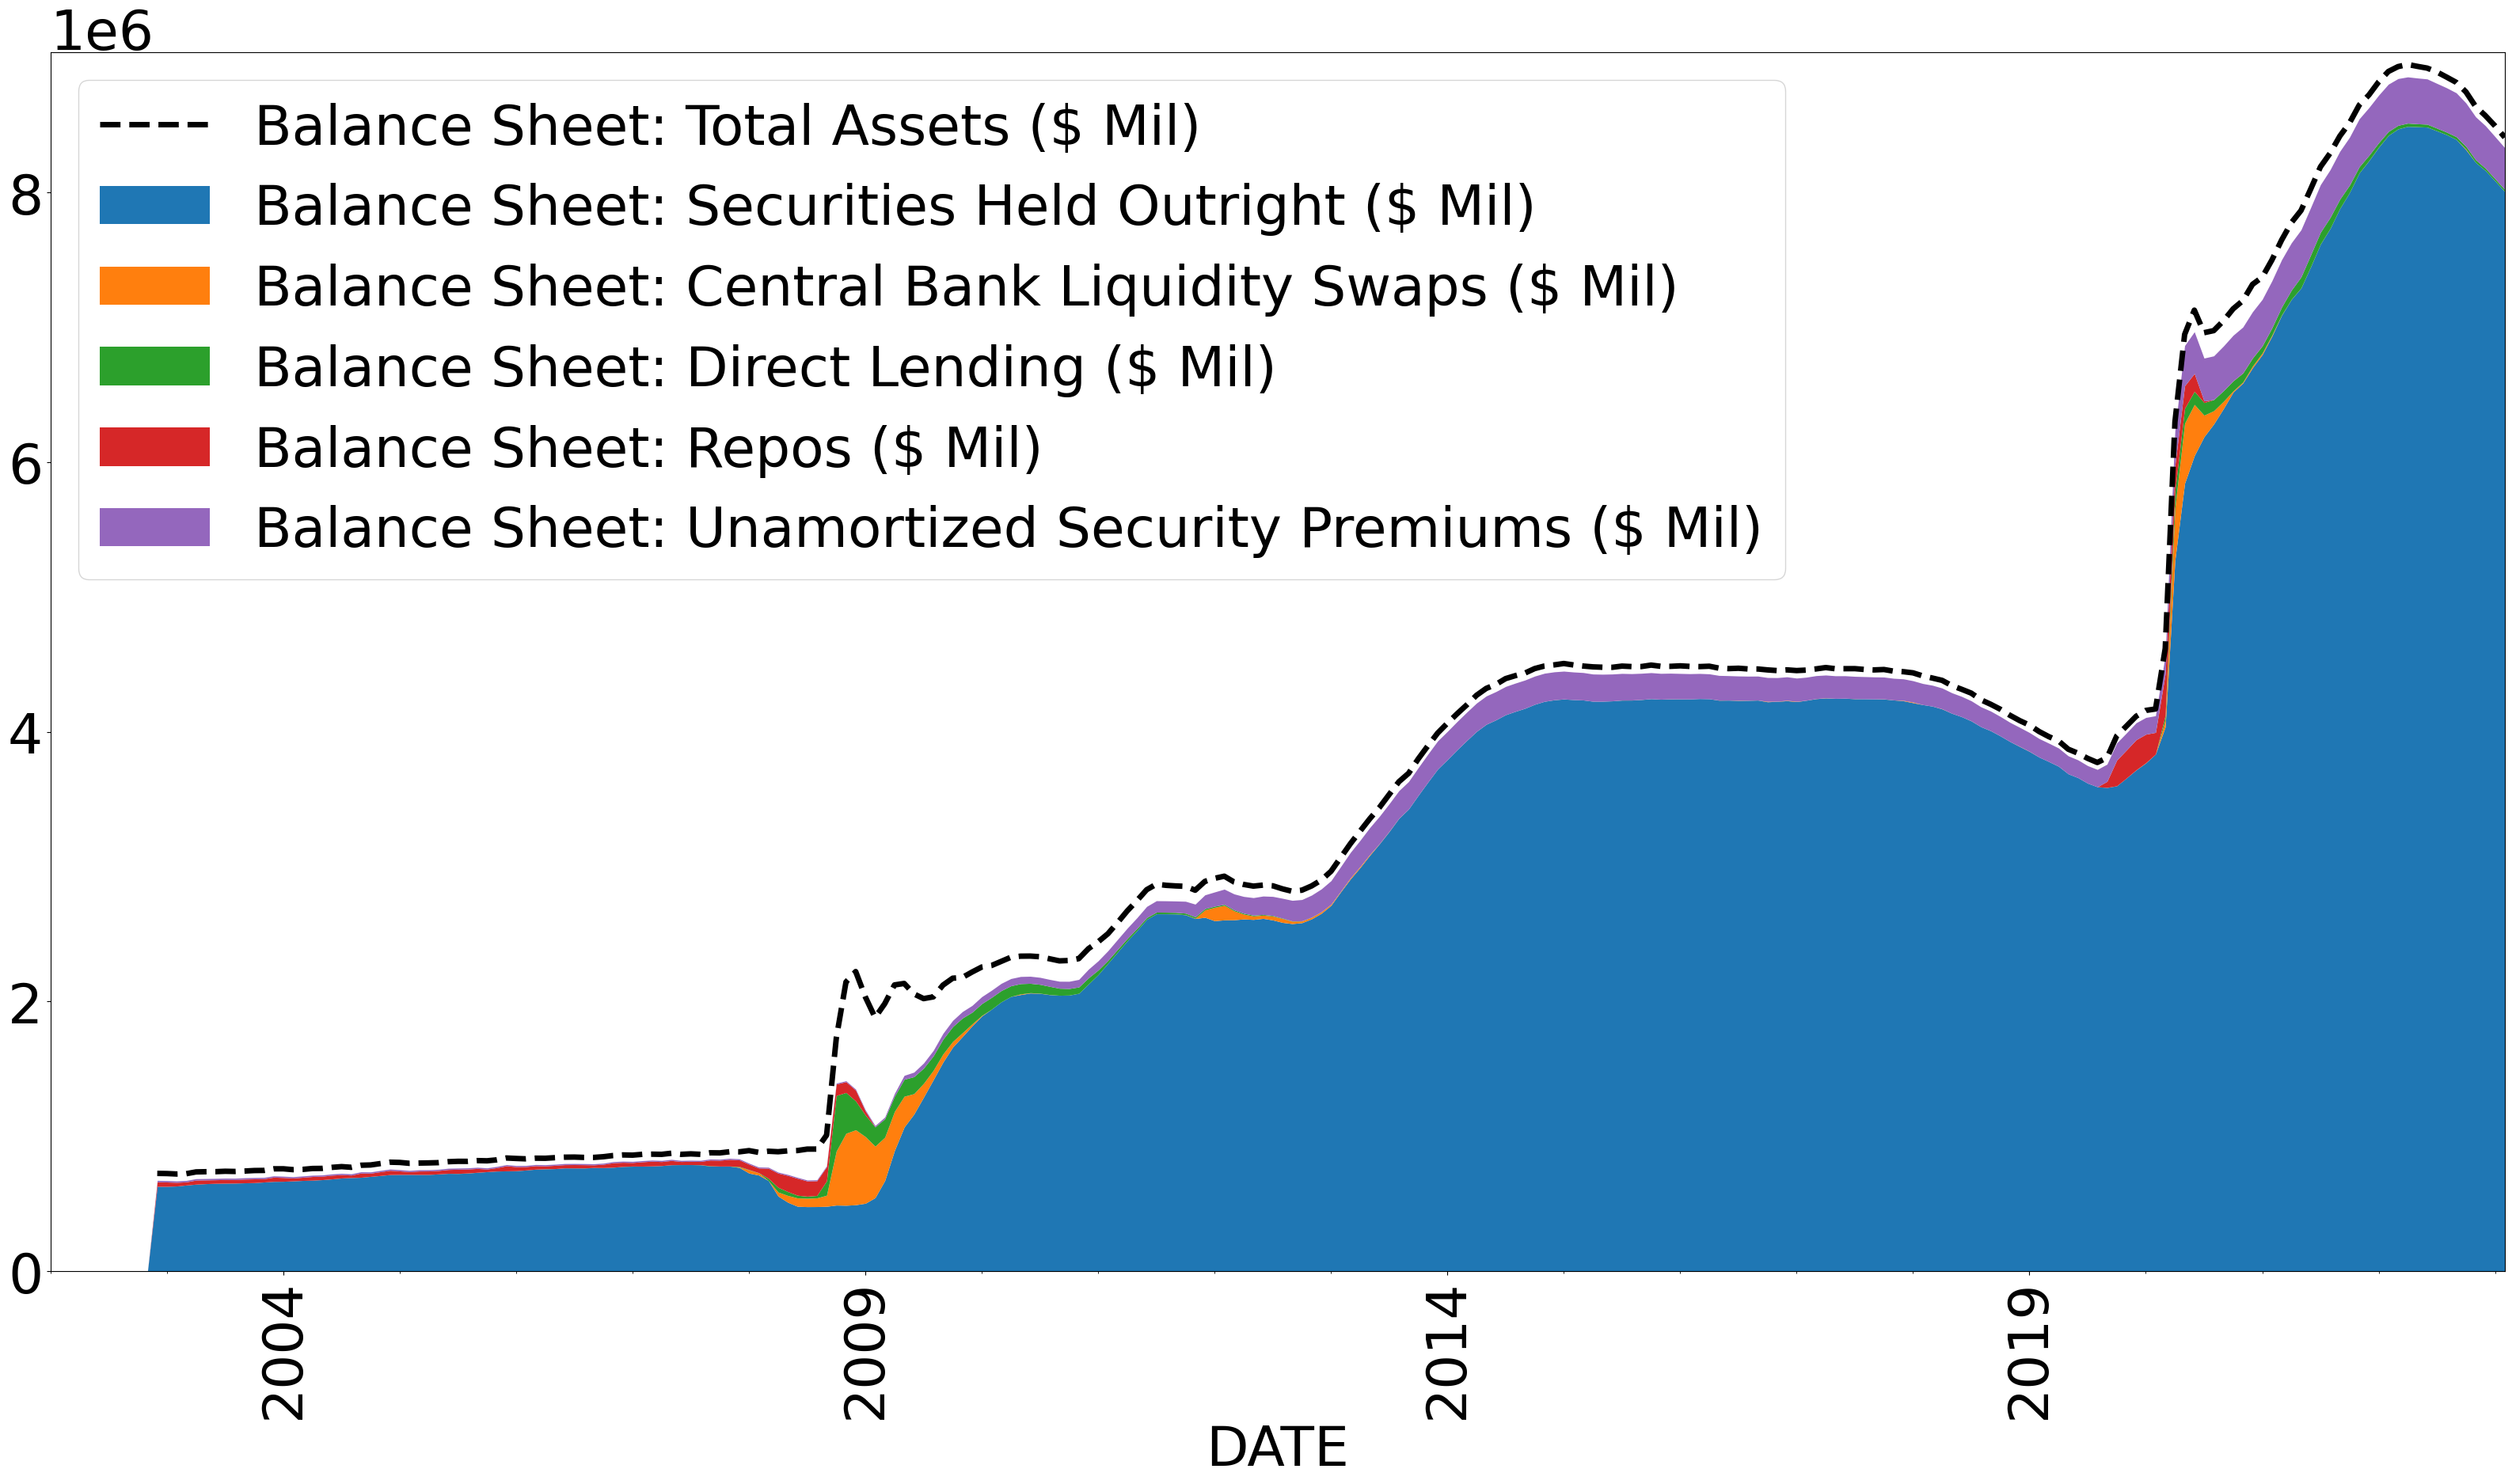

In [31]:
account_vars = ["Balance Sheet: Total Assets ($ Mil)","Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]
plot_data=data[account_vars]
stack_vars= account_vars[1:]
total_var = account_vars[0]
fig,ax=plot_stacked(df=plot_data,linewidth=5,stack_vars=stack_vars,total_var=total_var)

## Liabilties

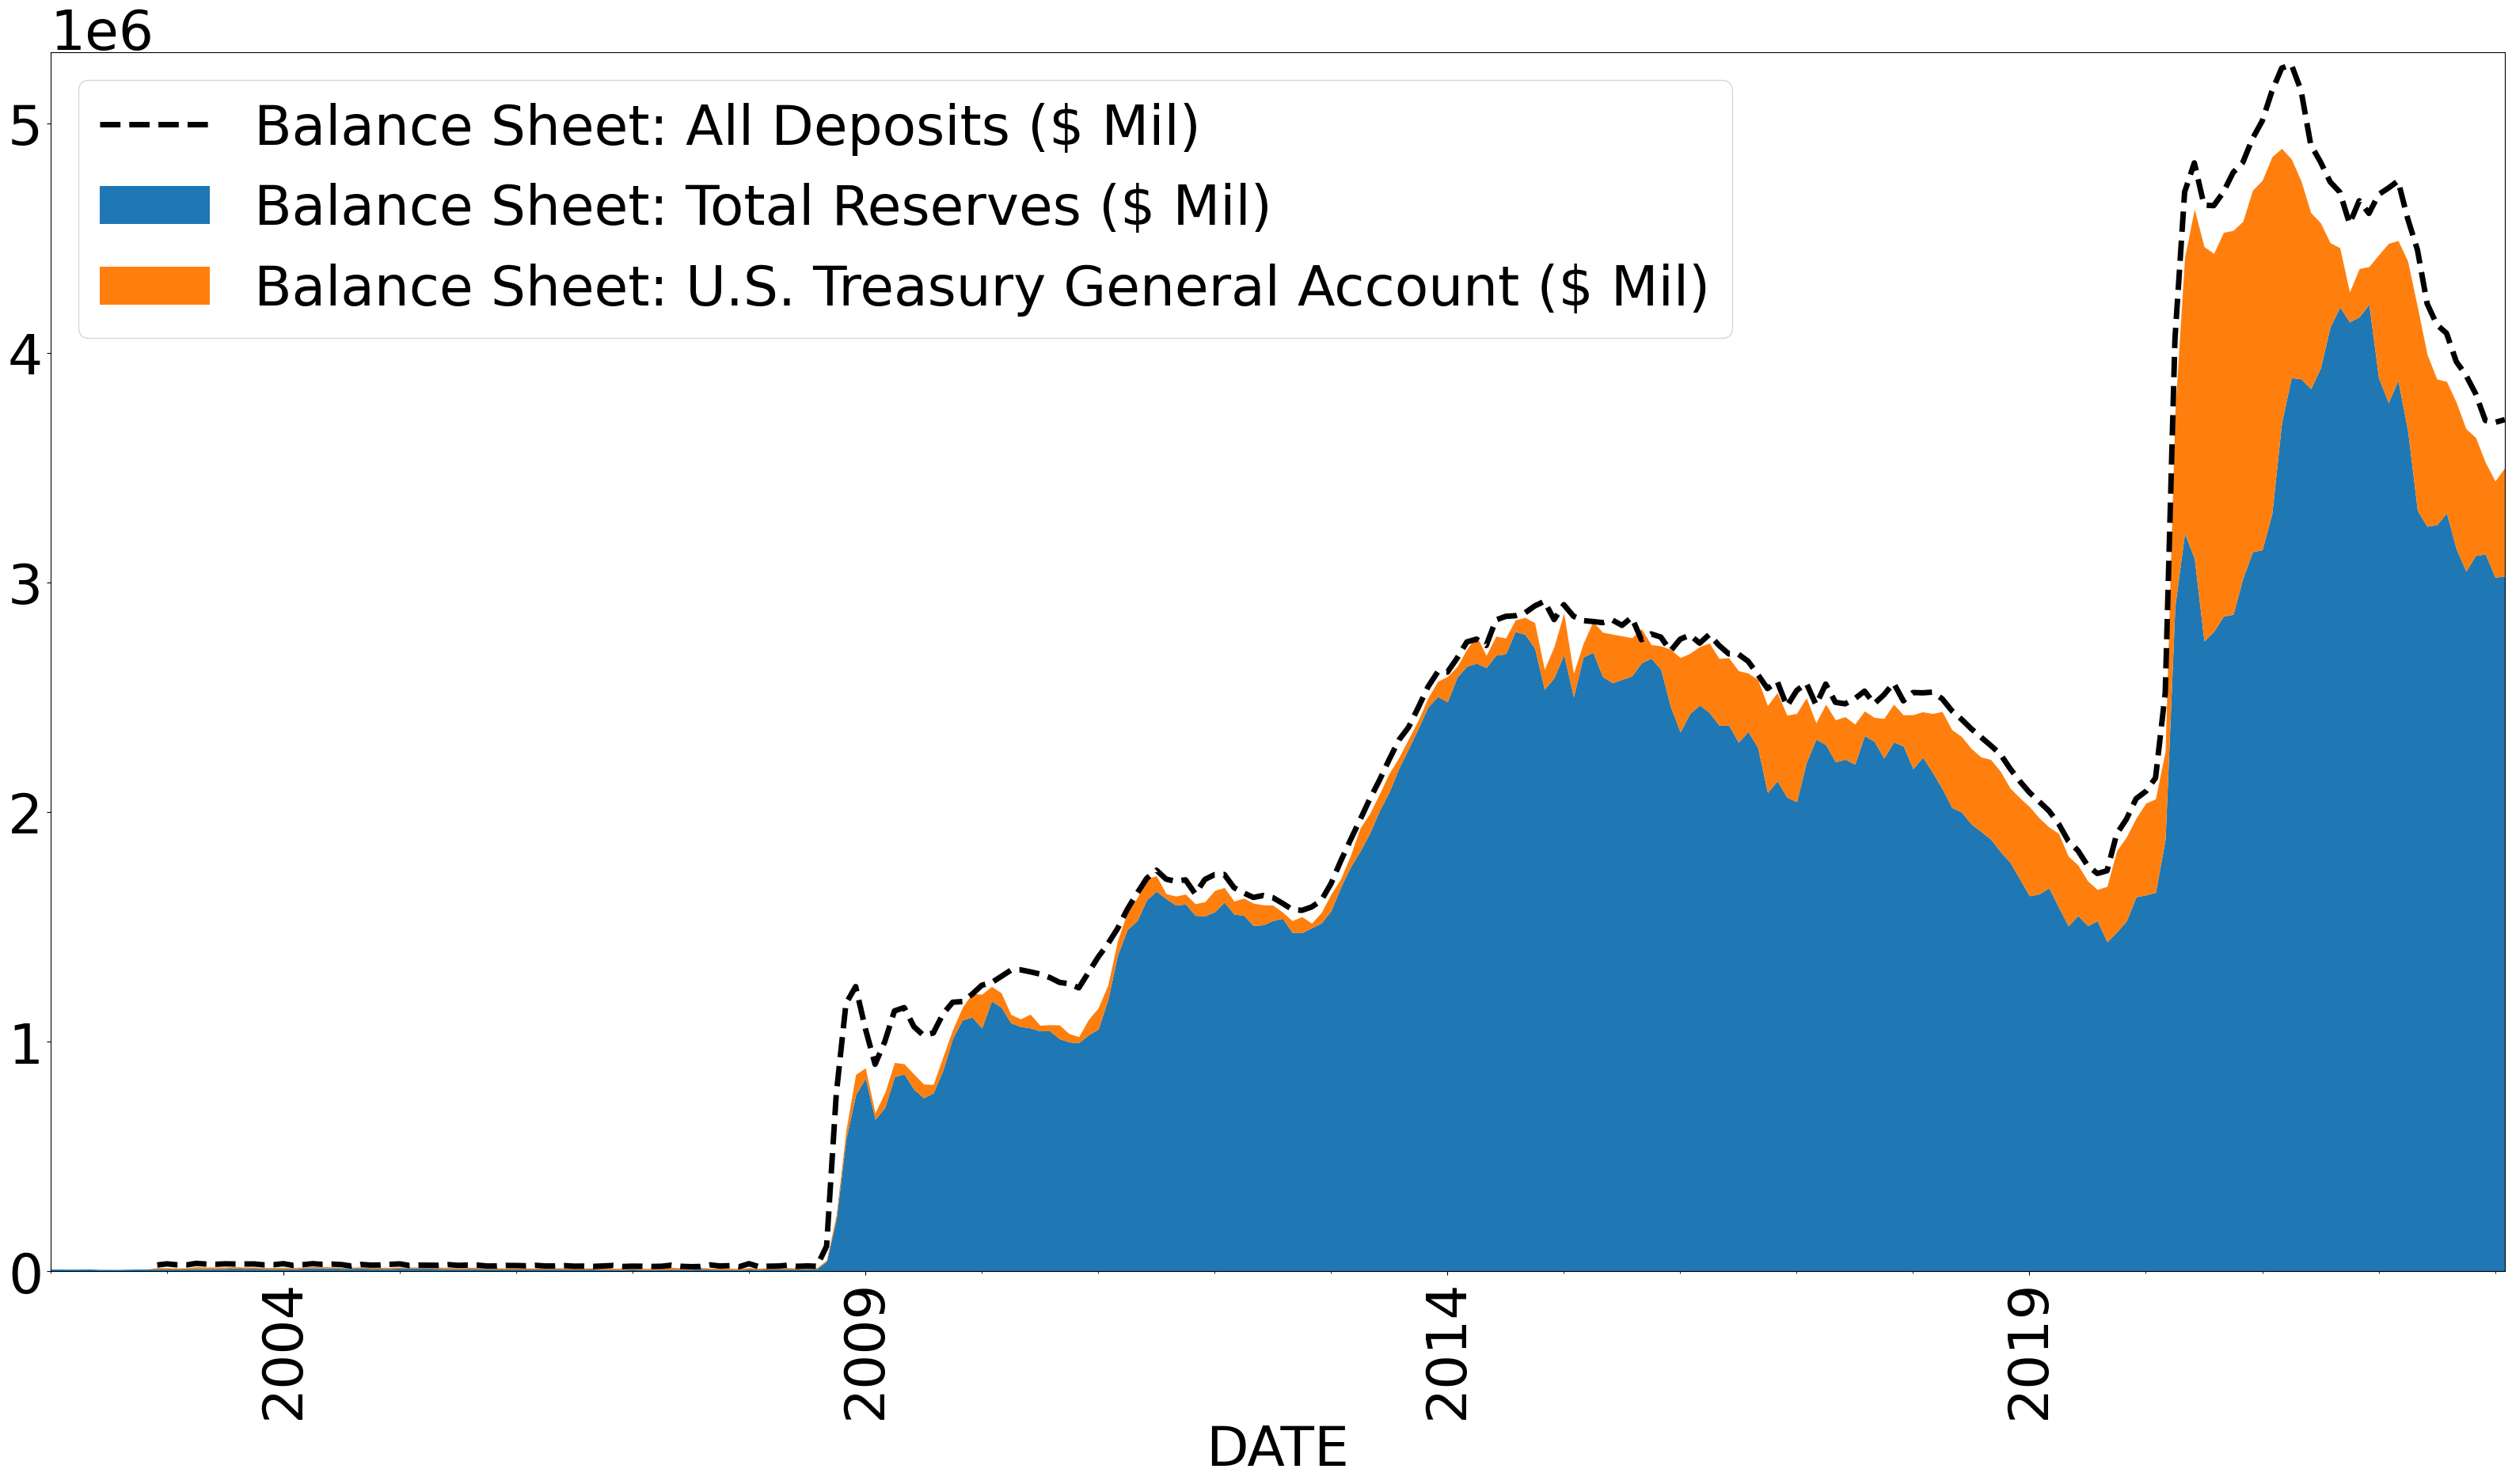

In [32]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)","Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]
plot_data=data[account_vars]
stack_vars= account_vars[1:]
total_var = account_vars[0]
fig,ax=plot_stacked(df=plot_data,linewidth=5,stack_vars=stack_vars,total_var=total_var)

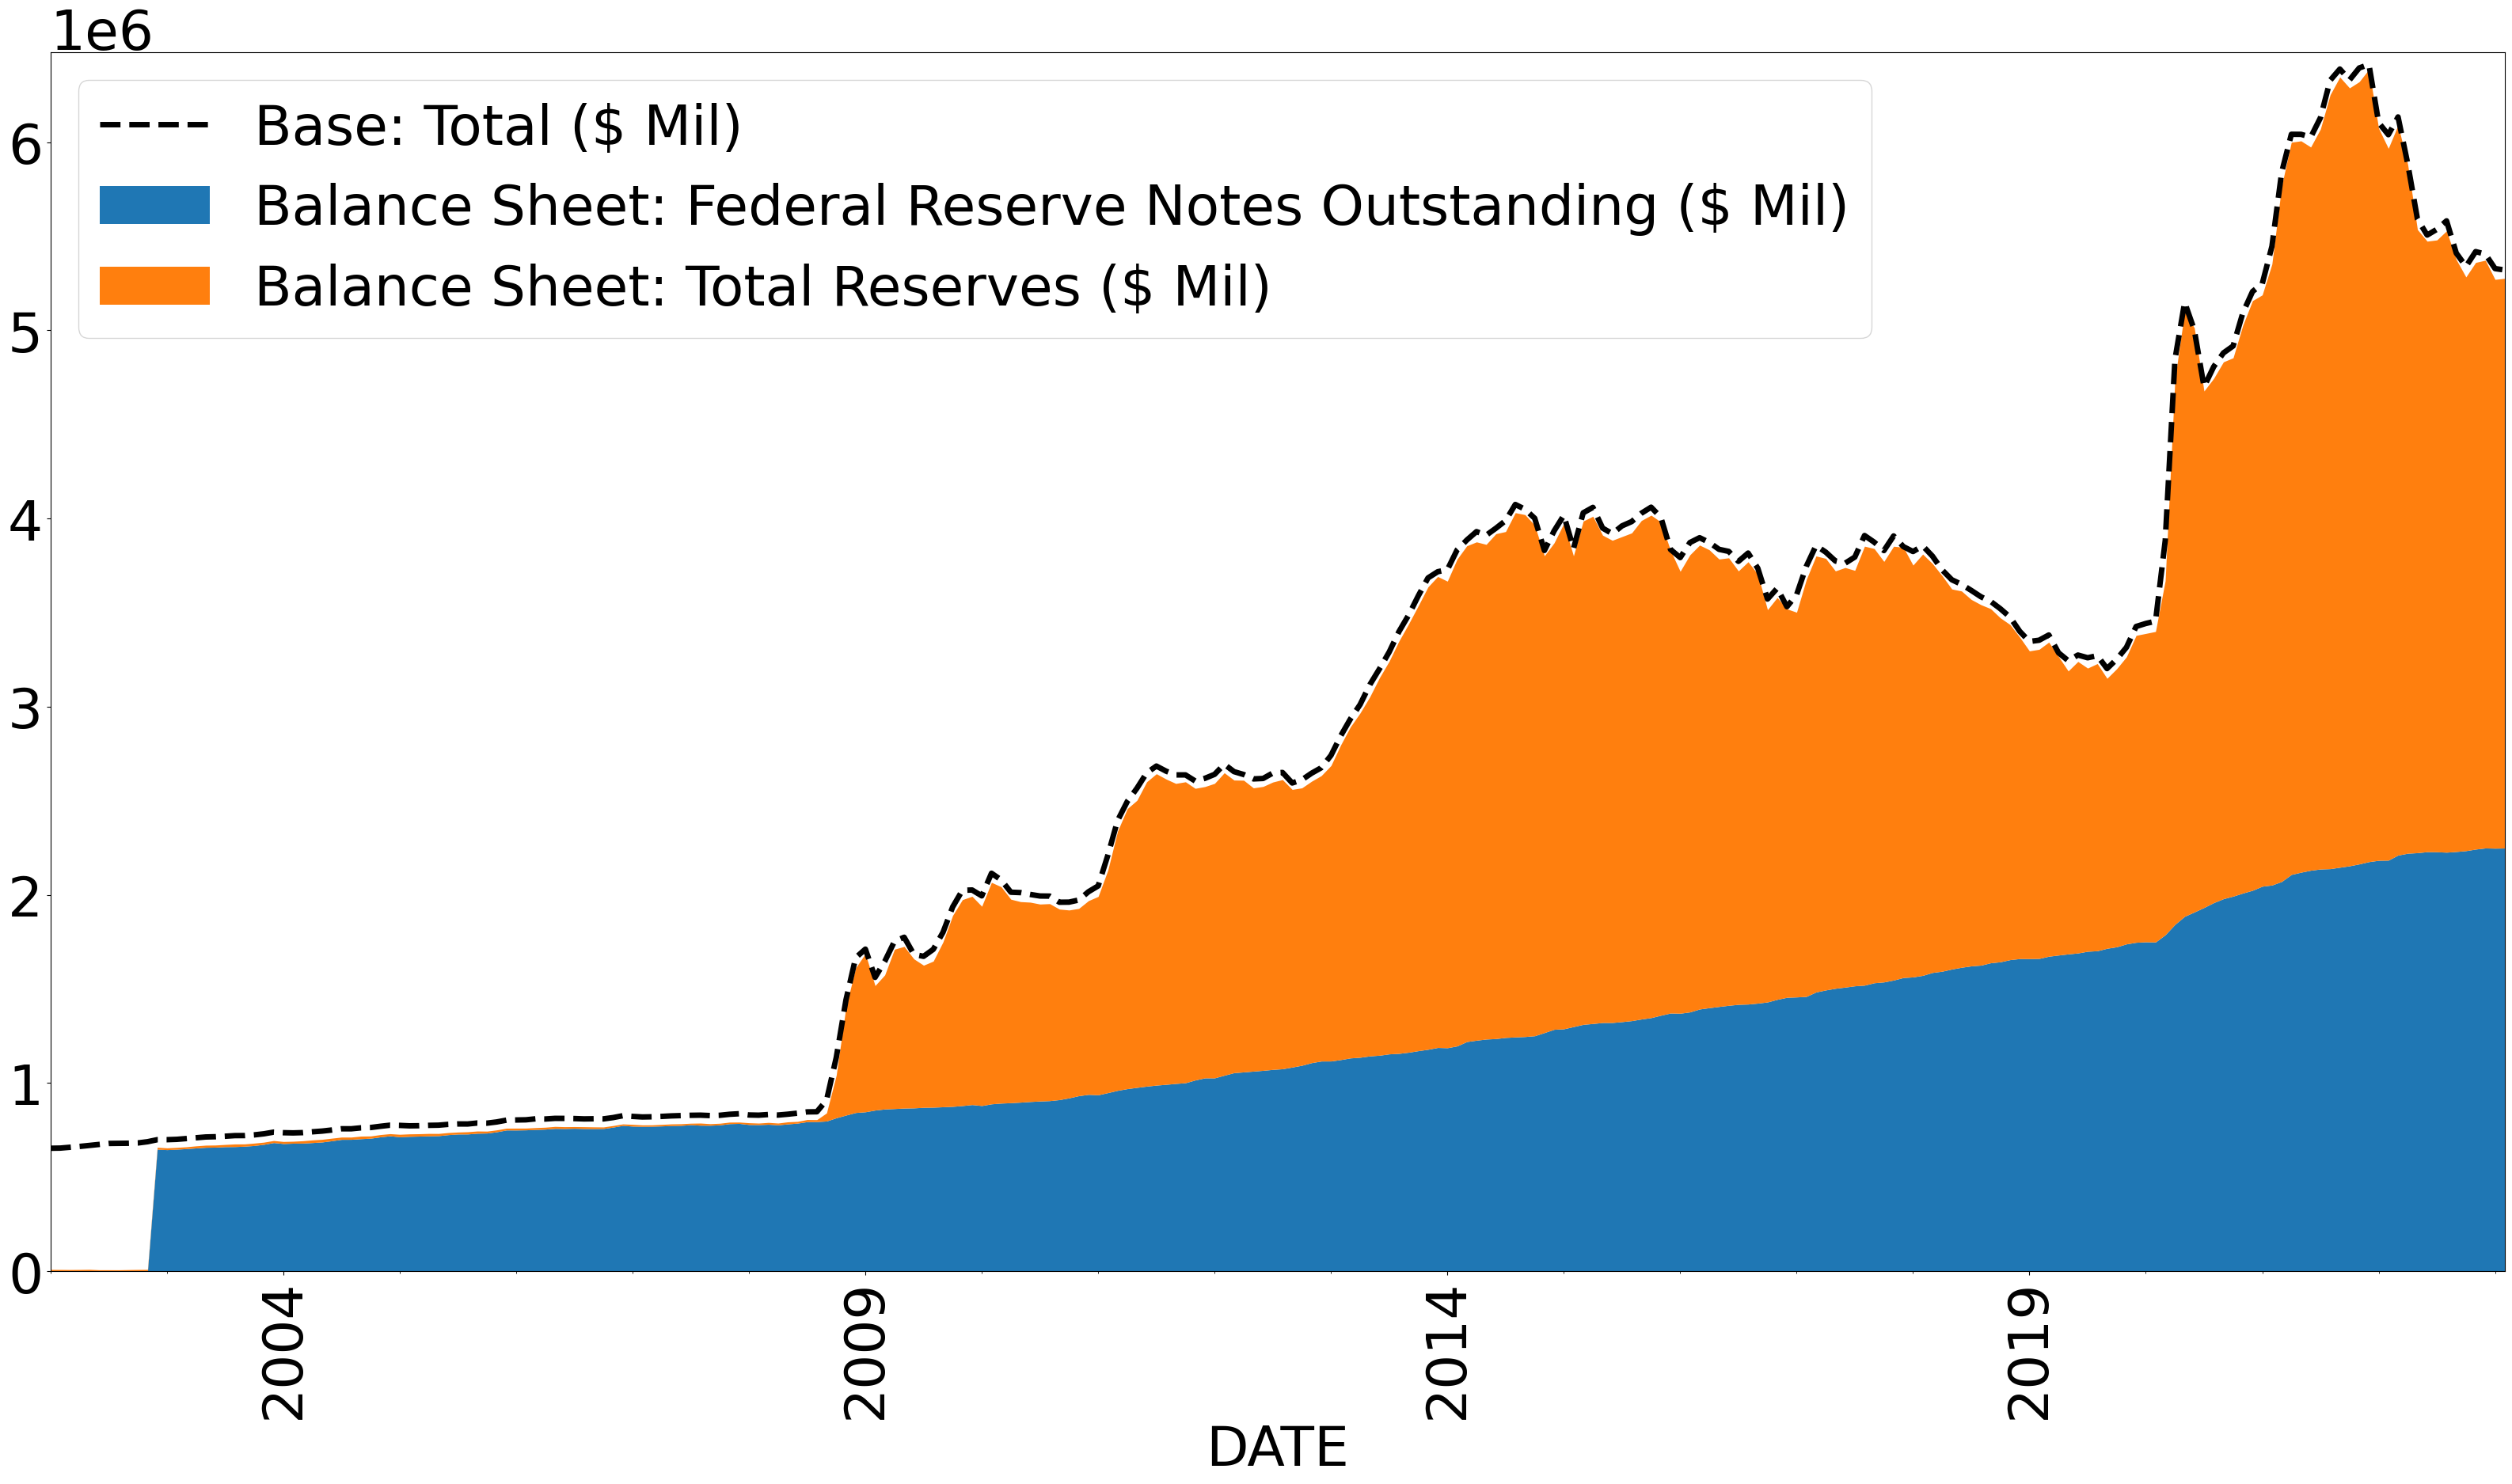

In [33]:
account_vars = ["Base: Total ($ Mil)","Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]
plot_data=data[account_vars]
stack_vars= account_vars[1:]
total_var = account_vars[0]
fig,ax=plot_stacked(df=plot_data,linewidth=5,stack_vars=stack_vars,total_var=total_var)

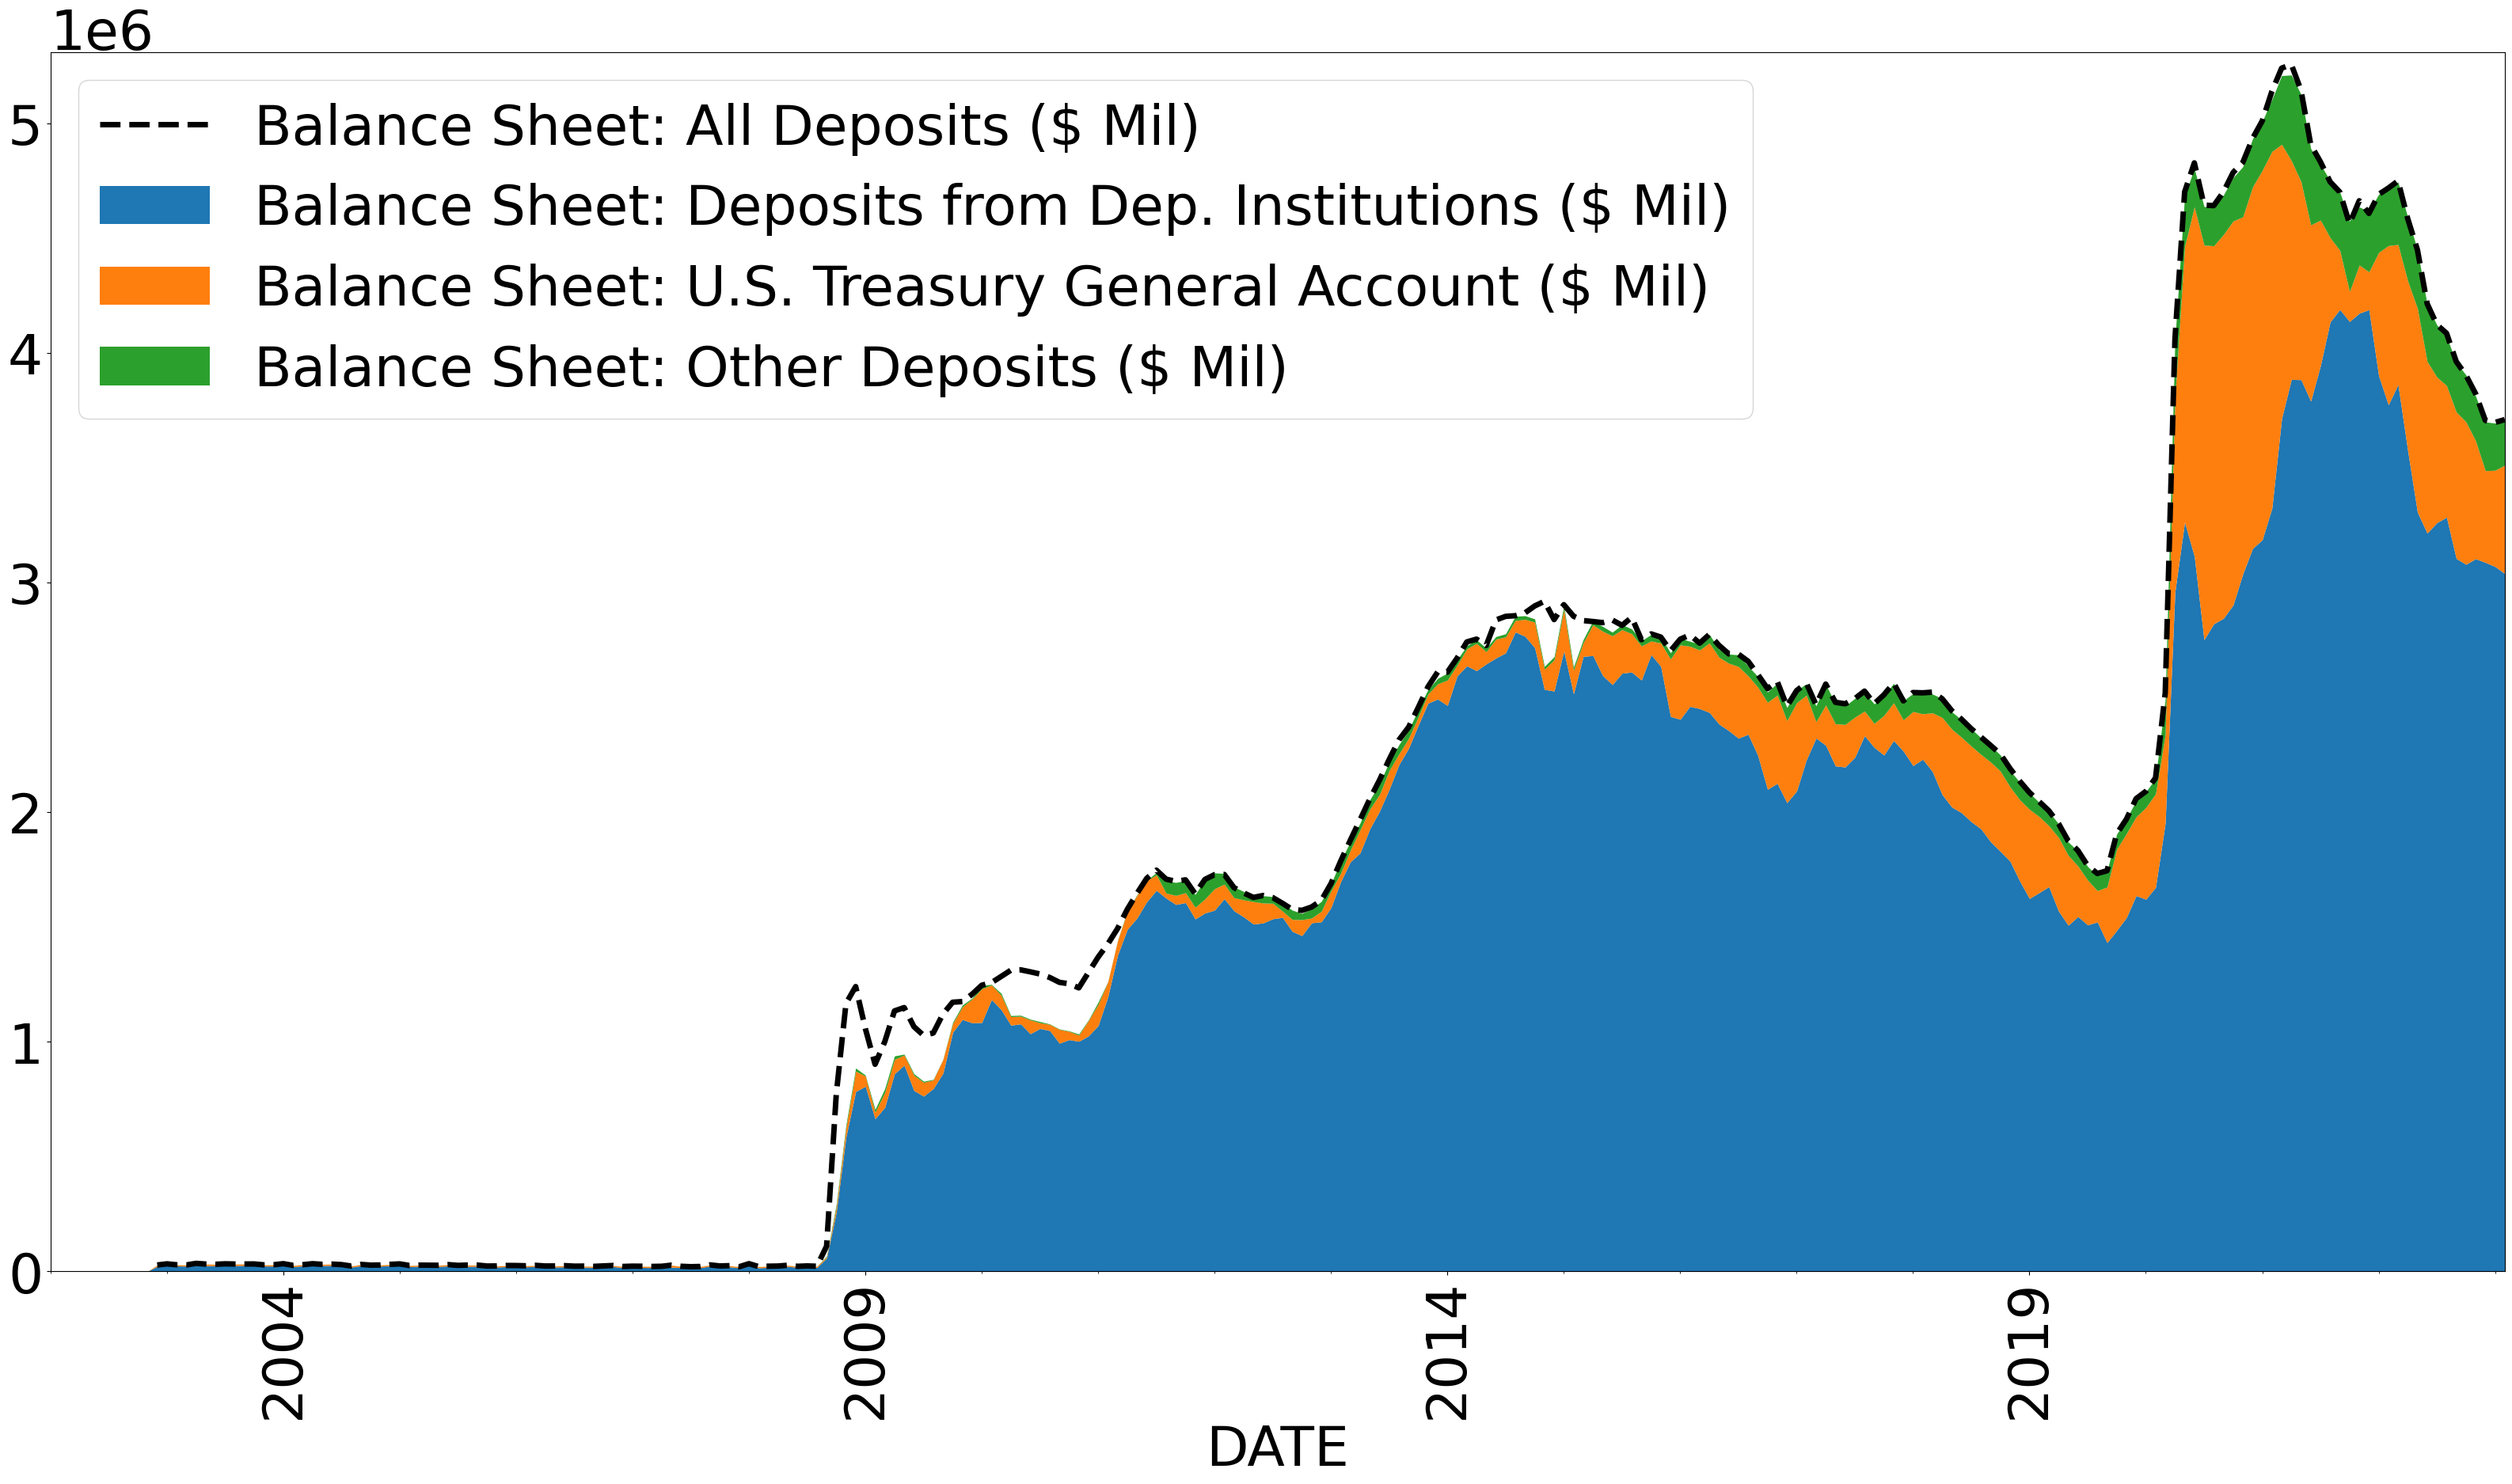

In [34]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)","Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)",
                "Balance Sheet: Other Deposits ($ Mil)"]
plot_data=data[account_vars]
stack_vars= account_vars[1:]
total_var = account_vars[0]
fig,ax=plot_stacked(df=plot_data,linewidth=5,stack_vars=stack_vars,total_var=total_var)

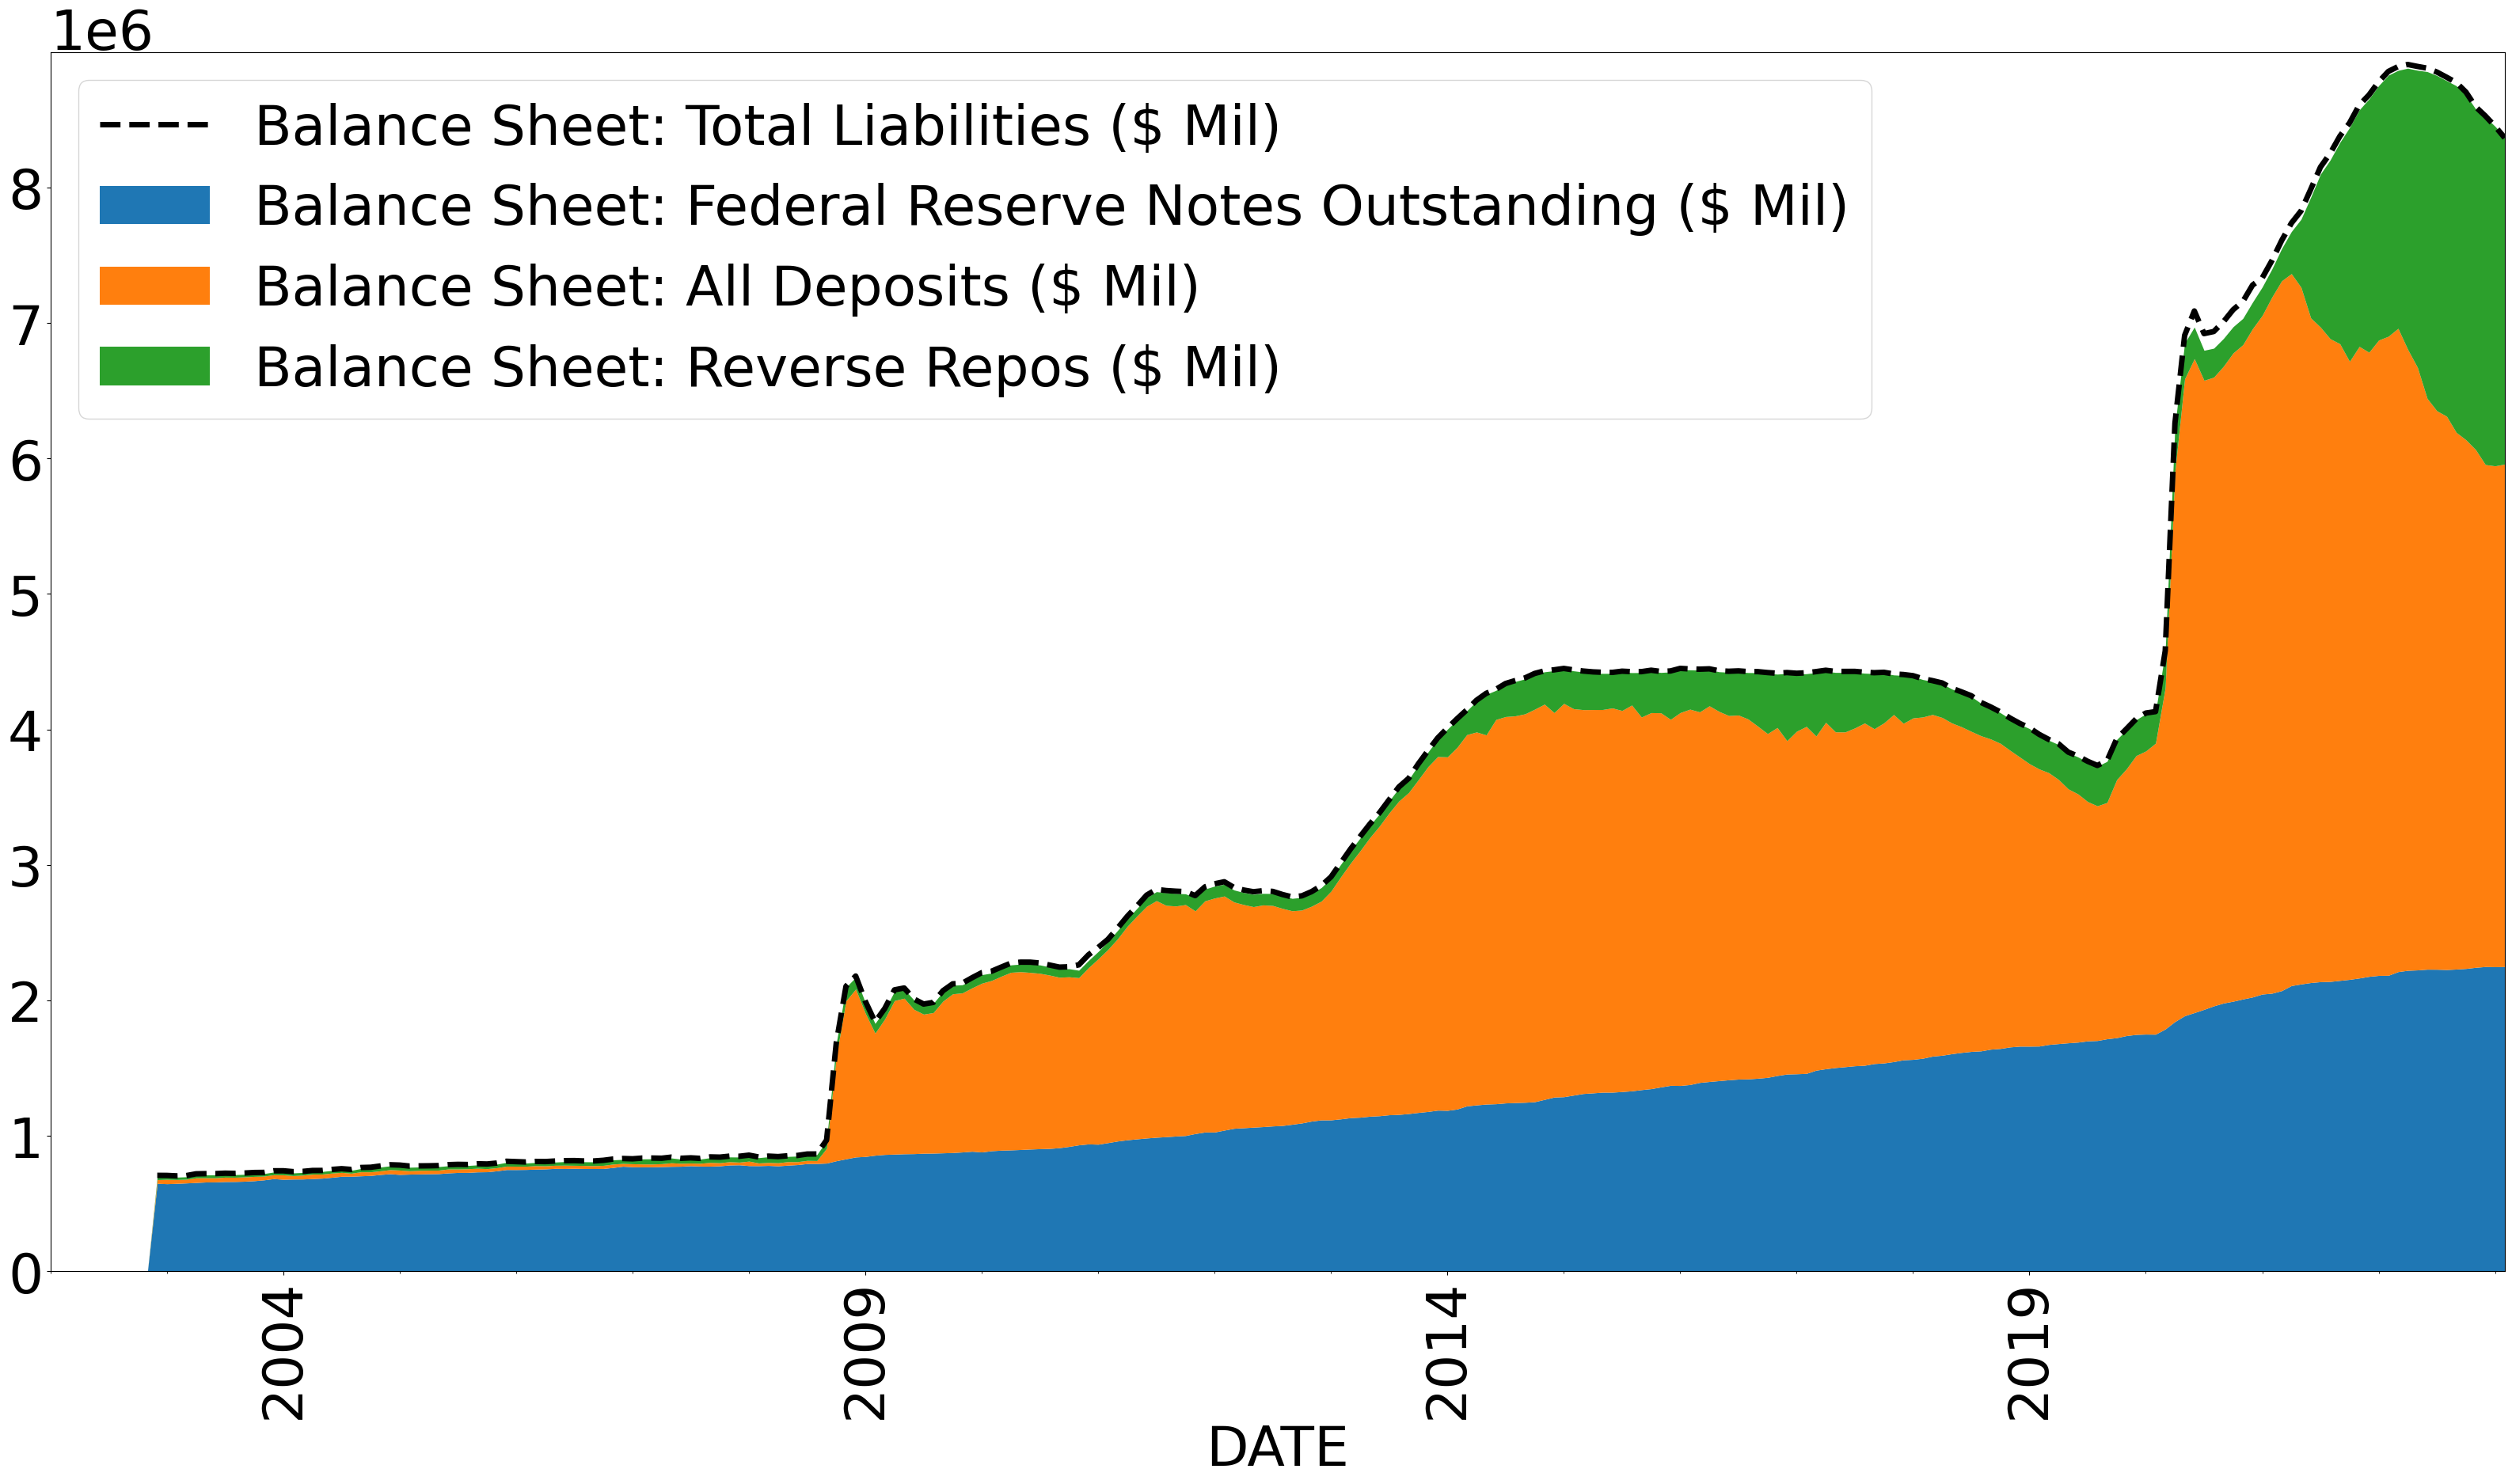

In [35]:
account_vars = ["Balance Sheet: Total Liabilities ($ Mil)",
                "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]
plot_data=data[account_vars]
stack_vars= account_vars[1:]
total_var = account_vars[0]
fig,ax=plot_stacked(df=plot_data,linewidth=5,stack_vars=stack_vars,total_var=total_var)

In [36]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])
overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                  "Balance Sheet: Repos - Reverse Repos ($ Mil)"]
plot_data= data[overnight_vars].dropna()
plot_data

Balance Sheet: Repos ($ Mil)  \
DATE                                       
2002-12-31                      33625.00   
2003-01-31                      32100.00   
2003-02-28                      27185.50   
2003-03-31                      23625.00   
2003-04-30                      30350.20   
...                                  ...   
2022-10-31                          2.75   
2022-11-30                          2.40   
2022-12-31                          0.75   
2023-01-31                          0.50   
2023-02-28                          3.00   

            Balance Sheet: Reverse Repos ($ Mil)  \
DATE                                               
2002-12-31                              21150.50   
2003-01-31                              18920.40   
2003-02-28                              17715.25   
2003-03-31                              18133.00   
2003-04-30                              20125.20   
...                                          ...   
2022-10-31                            2546553.75   
2022-11-30                            2515098.20   
2022-12-31                            2565125.75   
2023-01-31                            2507038.75   
2023-02-28                            2416784.25   

            Balance Sheet: Repos - Reverse Repos ($ Mil)  
DATE                                                      
2002-12-31                                      12474.50  
2003-01-31                                      13179.60  
2003-02-28                                       9470.25  
2003-03-31                                       5492.00  
2003-04-30                                      10225.00  
...                                                  ...  
2022-10-31                                   -2546551.00  
2022-11-30                                   -2515095.80  
2022-12-31                                   -2565125.00  
2023-01-31                                   -2507038.25  
2023-02-28                                   -2416781.25  

[243 rows x 3 columns]

## Interbank/Overnight Lending Market

## Repo Operations

C:\Users\joeyw\AppData\Local\Temp\ipykernel_12292\1000717261.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2)for y in y_vals])


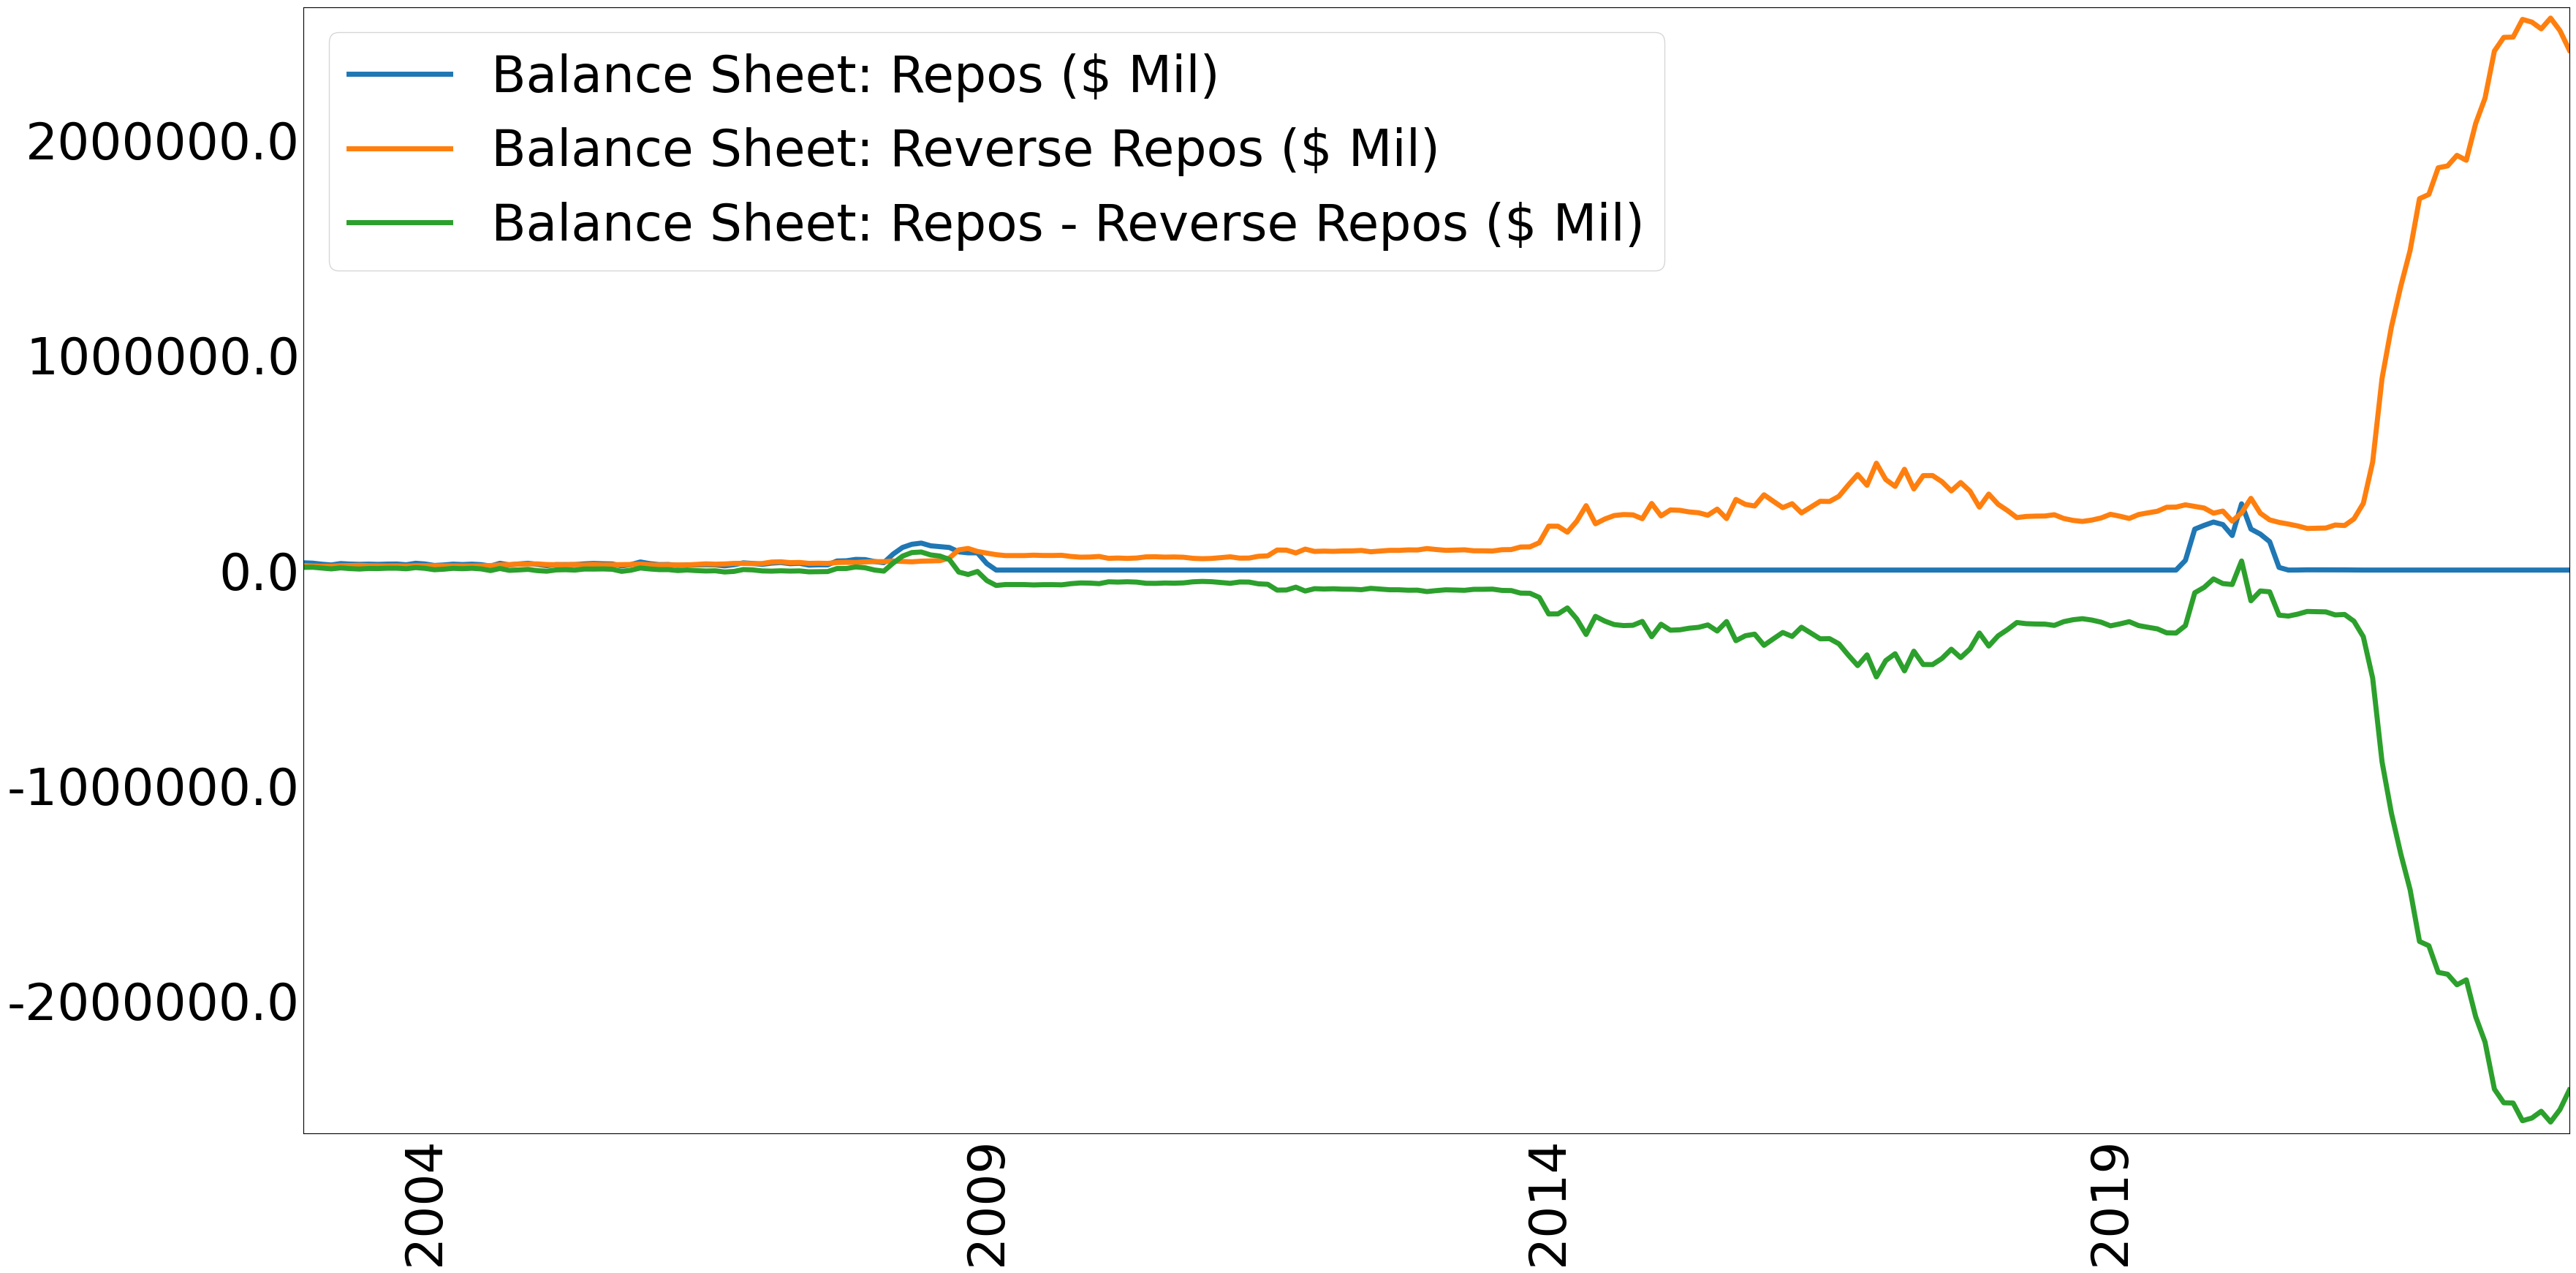

In [37]:
fig, ax=plot_lines(plot_data)

### Federal Funds Rate

C:\Users\joeyw\AppData\Local\Temp\ipykernel_12292\1000717261.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2)for y in y_vals])


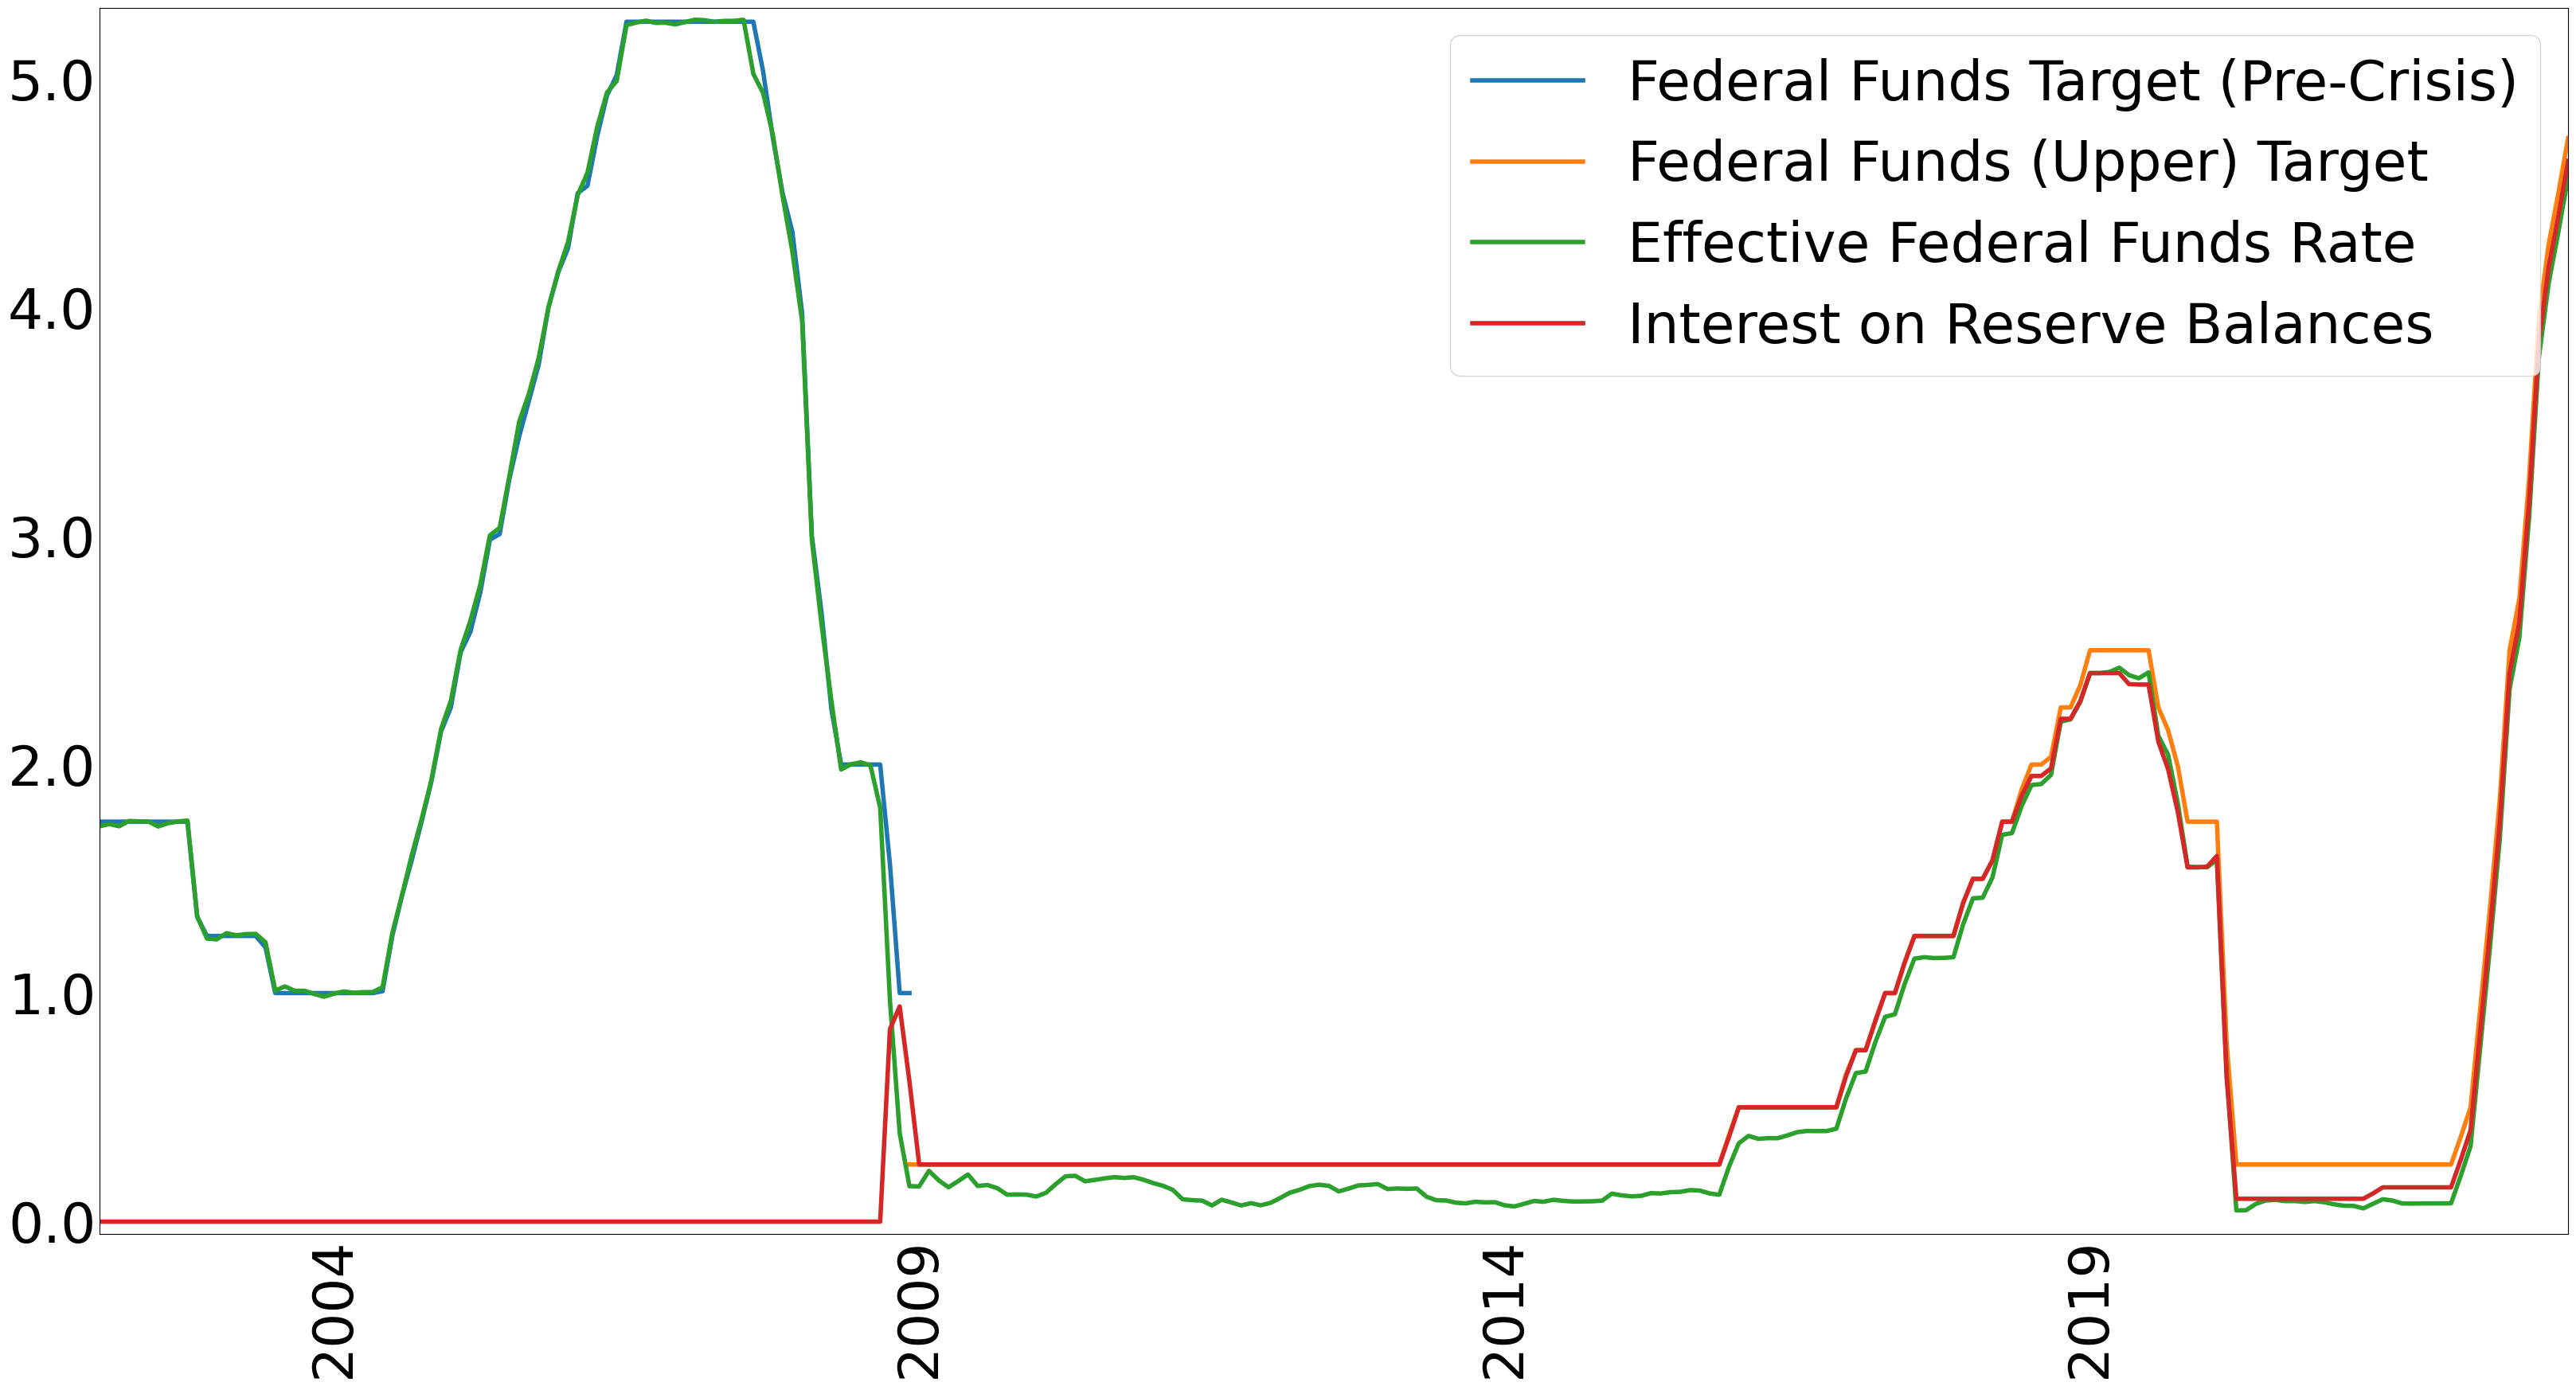

In [55]:
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                  "Federal Funds (Upper) Target",
                  "Effective Federal Funds Rate",
                  "Interest on Reserve Balances"]
plot_data = data[interest_vars]
fig,ax = plot_lines(data[interest_vars],linewidth=4)